# Machine Team 4 (Michael DiSanto, Dawn Massey & Brian Nicholls)
### BA545: Data Mining - Competition #2 (Online Shoppers' Purchasing Intentions)
#### Data Audit Report - Spring 2020


<img src="https://i.ytimg.com/vi/CRKn-9gVNBw/maxresdefault.jpg" width=60%/>

Note: This work was completed using the CRISP-DM Framework shown above; accordingly, it will serve as an organizing framework for this report.

#### **Table of Contents:**

0. [Part 0: Preparing for Analysis](#part0)
1. [Part I: Business Issue Understanding](#part1)
2. [Part II: Data Understanding & Exploratory Data Analysis (EDA)](#part2)
3. [Part III: Data Preparation](#part3)

#### **Note: Parts IV onward are for future work**
4. [Part IV: Data Analysis/Modeling](#part4)
5. [Part V: Validation](#part5)
6. [Part VI: Presentation/Visualization](#part6)
7. [Part VII: Sources](#part7)



# Part 0: Preparing for Analysis  <a name="part0"></a>
#### Import the necesary packages for reading, analyzing, tidying, medeling, & evaluating the data

In [4]:
# # TO USE FOR ENTIRE TEAM
# import pandas as pd
# import numpy as np
# from pandas_profiling import ProfileReport
# import statsmodels.api as sm
# from scipy import stats
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

In [1]:
# TO USE FOR DWM ONLY
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

In [2]:
# Processing the data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler().fit(X_train) >>> standardized_X = scaler.transform(X_train) >>> standardized_X_test = scaler.transform(X_test
from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(X_train) >>> normalized_X = scaler.transform(X_train) >>> normalized_X_test = scaler.transform(X_test)
from sklearn.preprocessing import Binarizer 
# binarizer = Binarizer(threshold=0.0).fit(X) >>> binary_X = binarizer.transform(X)

# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# enc = LabelEncoder()
# y = enc.fit_transform(y)
from sklearn.impute import (SimpleImputer, KNNImputer, MissingIndicator)
from sklearn.experimental import enable_iterative_imputer
# imp = Imputer(missing_values=0, strategy='mean', axis=0) >>> imp.fit_transform(X_train)
from sklearn.preprocessing import PolynomialFeatures 
# poly = PolynomialFeatures(5) >>> poly.fit_transform(X)

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


# Various Models
from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=3, random_state=0

from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)

from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
from sklearn.linear_model import RidgeCV
# rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)

from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
from sklearn.svm import SVC 
# svc = SVC(kernel='linear')
from sklearn.linear_model import LinearRegression
# lr = LinearRegression(normalize=True)
from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier(n_neighbors=5)

## Fit the model
# # Supervised learning
# lr.fit(X, y)
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)   

# #Unsupervised Learning 
# k_means.fit(X_train) 
# pca_model = pca.fit_transform(X_train)

## Predict Y
# Supervised Estimators
# y_pred = svc.predict(np.random.random((2,5))) 
# y_pred = lr.predict(X_test)
# y_pred = knn.predict_proba(X_test)   
# Unsupervised Estimators 
# y_pred = k_means.predict(X_test)


# Packages to evaluate Model Performance (Classification)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report 
# print(classification_report(y_test_log, y_pred_log))

# Packages to evaluate Model Performance (Linear)
from sklearn.metrics import mean_absolute_error 
# y_true = [3, -0.5, 2] >>> mean_absolute_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score 
# r2_score(y_true, y_pred)

#from sklearn.cross_validation import cross_val_score 
# print(cross_val_score(knn, X_train, y_train, cv=4)) >>> print(cross_val_score(lr, X, y, cv=2)


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [3]:
df = pd.read_csv('online_shoppers_intention.csv', na_values=r'-')

# Part I: Business Issue Understanding  <a name="part1"></a>

## A. Research Question:
Overall, this project's research question is: *What drives potential customers to make purchases?*

## B. Scope of Work:
This project is a classification project in which the members of Machine Team 4 (Michael DiSanto, Dawn Massey and Brian Nicholls) will use the data feature, Revenue, as the target feature when predicing whether a consumer made a purchase and, thus, is part of Class 1 (i.e., if Revenue > 0) or, instead, whether the consumer did not make a purchase and, thus, is part of Class 0 (i.e., if Revenue <= 0). 

Using the 10 numerical (continous) and 8 categorical features in the given dataset, members of the team we will utilize advanced and novel methods in preparing the data to design and implement a model for the client that will predict whether a site visitors will make a purchase. The model will be evaluated on the basis of its prediction accuracy and its predictive power. 

Deliverable due dates are as follows:
*     Data Audit Report due Tuesday, March 31, 2020
*     Initial Data Model due Tuesday, April 14, 2020
*     Final Presentation and Report due Tuesday, April 28, 2020

## C. Business Understanding:
Online shopping is an important revenue source for many retail businesses, such as our client. According to Sakar et al. (2019), desipte increases in e-commerce traffic in the recent past, "conversion" (of browsers to purchasers) has not increased proportionately. Indeed, the dataset includes 12,330 "sessions," of which only 1908 (15.5%) resulted in conversion (Sakar et al. 2019, 6895). Thus, it is very important for retail companies, such as our client, to better understand - in real time - the cues that drive conversion. Complicating the process is that unlike "brick and mortar" stores where shoppers can interact with salespeople who, in turn, can help to facilitate (or at least understand) customer conversion on the basis of their interaction, online retail businesses must *infer* customer behavior from other cues. But, what are those cues for our client? As part of determining whether a "browser" will become a "purchaser," our client also might like to know about the cues suggesting the opposite behavior - i.e., abandoning the site or the shopping cart. Additionally, the client might like to know why customers purchasing competitors' products fail to visit their website. On the basis of our models, our client is interested in knowing what we might suggest doing (in real time) to increase conversion/reduce abandonment. Further our client might also like to know if we believe there are other factors that have not been captured in the dataset that might be helpful in better predicting conversion/abandonment in the future as well as figuring out how to attract to the client's websitem consumers who make purchases on competitors' websites.

Past research has focused on: 
clickstream data
session information
session length in terms of the number of Web pages visited in a session
session duration in seconds
average time per page in seconds
traffic type (representing the page that referred the user to a particular (bookstore) site
three binary variables representing a set of key perations related to the commercial intent
a set of product categories viewed during the session 
sequential data/most frequently followed navigation paths
(see Sakar et al. 2019, p. 6894, ff.)


### _Reference:_
Sakar, C., S. Polat, M. Katircioglu and Y. Kastro. 2019. Real-time predicgion of online shoppers' purchasing intention using multilayer perceptron and LSTM recurrent neural networks. *Neural Computing and Applications 31:* 6893-6908.


# Part II: Data Understanding & Exploratory Data Analysis  <a name="part2"></a>

## A. Data Understanding
Data Understanding includes providing an overview of the dataset, conducting exploratory data analysis, verifying data quality, and deciding how to address data quality issues.

#### _1. Overview of Dataset_
The dataset that has been gathered for purposes of this analysis contains 18 variables: Revenue, which is the Target Variable (where Revenue = TRUE if the customer visiting the website made a purchase - i.e., Class 1; and Revenue = FALSE if the customer visiting the website did not make a purchase - i.e., Class 0); and 17 predictor variables, including 10 continuous features and 7 categorical features, each of which are listed below and then delineated within our Data Dictionary.


##### a. Continuous Features:
*     Administrative: Number of pages visited by the visitor about account management  
*     Administrative Duration: The total amount of time (in seconds) the visitor spent on account management-related pages
*     Informational: Number of pages visited by the visitor about Web site and its communciation and address information 
*     Informational Duration: The total amount of time (in seconds) the visitor spent on informational pages
*     Product Related: Number of pages visited by the visitor about product-related pages  
*     Product Related Duration: The total amount of time (in seconds) the visitor spent on product-related pages  
*     Bounce Rate: Average bounce rate value of the pages visited by the visitor
*          (Note: a "bounce" occurs when a visitor enters the site from a particular page and then leaves the site (bounces) 
*          without any further activity.)
*     Exit Rate: Average exit rate value of the pages visited by the visitor
*     Page Value: Average page value of the pages visited by the visitor
*     Special Day: Closeness of the visitor's visit to the site to a special day (e.g., Mother's Day, Valentine's Day)


##### b. Categorical Features:
*     OperatingSystems: Operating system of the visitor (8 possible operating systems)
*     Browser: Browser of the visitor (13 possible browsers)
*     Region: Geographic region from which the sesion has been started by the visitor (9 possible regions)
*     TrafficType: Traffic source by which the visitor has arrived at the Web site - e.g., banner, SMS, direct (20 possible types)
*     VisitorType: Visitor type as "New Visitor," "Returning Visitor," and "Other" (3 possible types)
*     Weekend: Boolean value indicating whether the date of the visit is a weekend (2 possible values)
*     Month: Month value for visit date (12 possible months)


##### c. Data Dictionary:

<table class="tg">
<tbody>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Data Dictionary</strong></td>
</tr>
<tr>
<tr>
<th class="tg-0pky">Variable</th>
<th class="tg-0pky">Variable Name</th>
<th class="tg-0pky">Variable Definition</th>
<th class="tg-fymr">Data Type</th>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Web Page Analytics &ndash; Numerical</strong></td>
</tr>
<tr>
<td class="tg-0pky"><strong>Home Page</strong></td>
<td class="tg-fymr">Administrative</td>
<td class="tg-fymr">Number of pages visited by the visitor about account management.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Home Page Duration</strong></td>
<td class="tg-fymr">Administrative_Duration</td>
<td class="tg-fymr">The total amount of time (in seconds) the visitor spent on account management-related pages.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Inforation Page</strong></td>
<td class="tg-fymr">Informational</td>
<td class="tg-fymr">Number of pages visited by the visitor about Web site and its communciation and address information.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Informational Duration</strong></td>
<td class="tg-fymr">Informational Duration</td>
<td class="tg-fymr">The total amount of time (in seconds) the visitor spent on informational pages.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Product Page</strong></td>
<td class="tg-fymr">ProductRelated</td>
<td class="tg-fymr">Number of pages visited by the visitor about product-related pages.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Product Related Duration</strong></td>
<td class="tg-fymr">ProductRelated_Duration</td>
<td class="tg-fymr">The total amount of time (in seconds) the visitor spent on product-related pages</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Bounce Rate</strong></td>
<td class="tg-fymr">BounceRates</td>
<td class="tg-fymr">The percentage of single page visits (or web sessions). It is the percentage of visits in which a person leaves your website from the landing page without browsing any further.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Exit Rate</strong></td>
<td class="tg-fymr">ExitRates</td>
<td class="tg-fymr">For all pageviews to the page, Exit Rate is the percentage that were the last in the session</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Page Value</strong></td>
<td class="tg-fymr">PageValues</td>
<td class="tg-fymr">the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both). This value is intended to give you an idea of which page in your site contributed more to your site's revenue.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Special Day</strong></td>
<td class="tg-fymr">SpecialDay</td>
<td class="tg-fymr">the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Web Page Analytics &ndash;Categorical</strong></td>
</tr>
<tr>
<td class="tg-0pky"><strong>Month</strong></td>
<td class="tg-fymr">Month</td>
<td class="tg-fymr">Month in which the visit took place</td>
<td class="tg-0pky">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>OperatingSystems</strong></td>
<td class="tg-fymr">OperatingSystems</td>
<td class="tg-fymr">Operating system of the computer in which the user used while viewing the site</td>
<td class="tg-0pky">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Browser</strong></td>
<td class="tg-fymr">Browser</td>
<td class="tg-fymr">Browser in which the user used to view the site</td>
<td class="tg-fymr">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Region</strong></td>
<td class="tg-fymr">Region</td>
<td class="tg-fymr">Region wher ethe user is located</td>
<td class="tg-fymr">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>TrafficType</strong></td>
<td class="tg-fymr">TrafficType</td>
<td class="tg-fymr">Traffic source by which the visitor has arrived at the Web site - e.g., banner, SMS, direct (20 possible types)</td>
<td class="tg-fymr">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Visitor Type</strong></td>
<td class="tg-fymr">VisitorType</td>
<td class="tg-fymr">Is this a returing visitor or a new visitor</td>
<td class="tg-fymr">Binary/Boolean</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Weekend</strong></td>
<td class="tg-fymr">Weekend</td>
<td class="tg-fymr">Did the visit happen on the weekend?</td>
<td class="tg-fymr">Binary/Boolean</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Revenue</strong></td>
<td class="tg-fymr">Revenue</td>
<td class="tg-fymr">Did the visit result in Revenue?</td>
<td class="tg-fymr">Binary/Boolean</td>
</tr>
<tr>



### B. Exploratory Data Analysis (EDA) &  Data Quality Verification (DQV)


#### _1. Overview of Findings from EDA & DQV (per the below):_
*     There are 12,330 observations with one target value and 17 features.
*     There are no missing values; however, we did note the following:
    ** There are no observations for January and April - which suggests the dataset does not include a full year's-worth of information, which may limit our ability to assess monthly trends/differences.
    ** A few (85) observations were coded as "other" - meaning they were neither new nor returning customers; since "new" and "returning" customers are mutually exclusive, the observations coded as "other" appear to be erroneous.
    ** 85% of the data come from Browser 1 (20%) or 2 (65%); hence, the data are not balanced with regard to browser
    ** Approximately 90% of the data comes from days other than "Special" days
    ** 
*     Bounce Rate and Exit Rate are highly correlated at 0.91; however, they also are highly correlated with the target variable (at -0.15 for Bounce Rate and at -0.25 for Exit Rate); hence, we are reluctant to remove either from our analysis. Rather, we will consider engineering a new feature that combines Bounce Rate with Exit Rate (e.g., via a linear combination of an average or weighted average of the features).
*     Administrative Page and Exit Rates are also highly correlated at -0.43; however, they, too, are highly correlated with the target variable (at 0.62 for Adminstative Page and at -0.25 for Exit Rate); hence, we are reluctant to remove either from our analysis. Rather, we will consider engineering a new feature that combines Administative Page with Exit Rate (e.g., via a division of one feature by the other).
*     Our data is imbalanced toward Revenue = False (i.e, Class 0, no purchases).



#### _2. Descriptive Statistics:_

In [4]:
sample =df.sample(30)
sample

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3342,2,108.000000,0,0.000000,8,316.500000,0.033333,0.040741,0.000000,0.0,May,3,2,3,11,Returning_Visitor,True,False
8170,0,0.000000,0,0.000000,8,561.500000,0.000000,0.050000,0.000000,0.0,Dec,2,4,7,20,Returning_Visitor,False,False
9940,4,63.000000,0,0.000000,10,565.500000,0.000000,0.015385,0.000000,0.0,Dec,8,13,9,20,Other,False,False
3738,5,232.400000,0,0.000000,6,190.400000,0.042857,0.061905,0.000000,0.0,May,1,1,1,3,Returning_Visitor,True,False
1053,0,0.000000,0,0.000000,9,159.000000,0.000000,0.022222,0.000000,0.0,Mar,2,2,1,2,Returning_Visitor,True,False
10385,7,154.000000,3,248.166667,34,886.479167,0.000000,0.005128,77.801588,0.0,Dec,2,2,1,2,New_Visitor,False,True
5455,0,0.000000,0,0.000000,1,207.570248,0.000000,0.007937,0.000000,0.0,Oct,2,2,1,5,Returning_Visitor,False,False
5245,0,0.000000,0,0.000000,42,1349.250000,0.000000,0.004065,0.000000,0.0,May,1,1,6,4,Returning_Visitor,True,False
3057,0,0.000000,0,0.000000,6,399.000000,0.000000,0.033333,0.000000,0.0,May,4,2,4,4,Returning_Visitor,False,False
7296,2,13.000000,0,0.000000,66,2061.926508,0.013235,0.014203,0.000000,0.0,Jul,3,2,6,3,Returning_Visitor,False,False


### Observations
----------------------------------------------------------------------
##### Initial import seems to accurate and complete in comparison to the data dictionary

In [5]:
# More info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

### Observations
----------------------------------------------------------------------
##### There are no null columns on import and 12330 rows and 18 columns
##### Month, VisitorType, Weekend, and Revenue are non-numberic attributes that may need adjustment later in the analysis.

In [6]:
# Inital description of the data
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Observations
----------------------------------------------------------------------

##### BounceRate, ExitRate, & SpecialDay are on a 0-1 scale, while the others nummerical attributies are on a differnt scale.
##### SpecialDay, OperatingSystem, Browser, Region, TrafficType are all categorical attributes which could be futher analyzed using encoding.

#### _3. Correlation Analysis:_

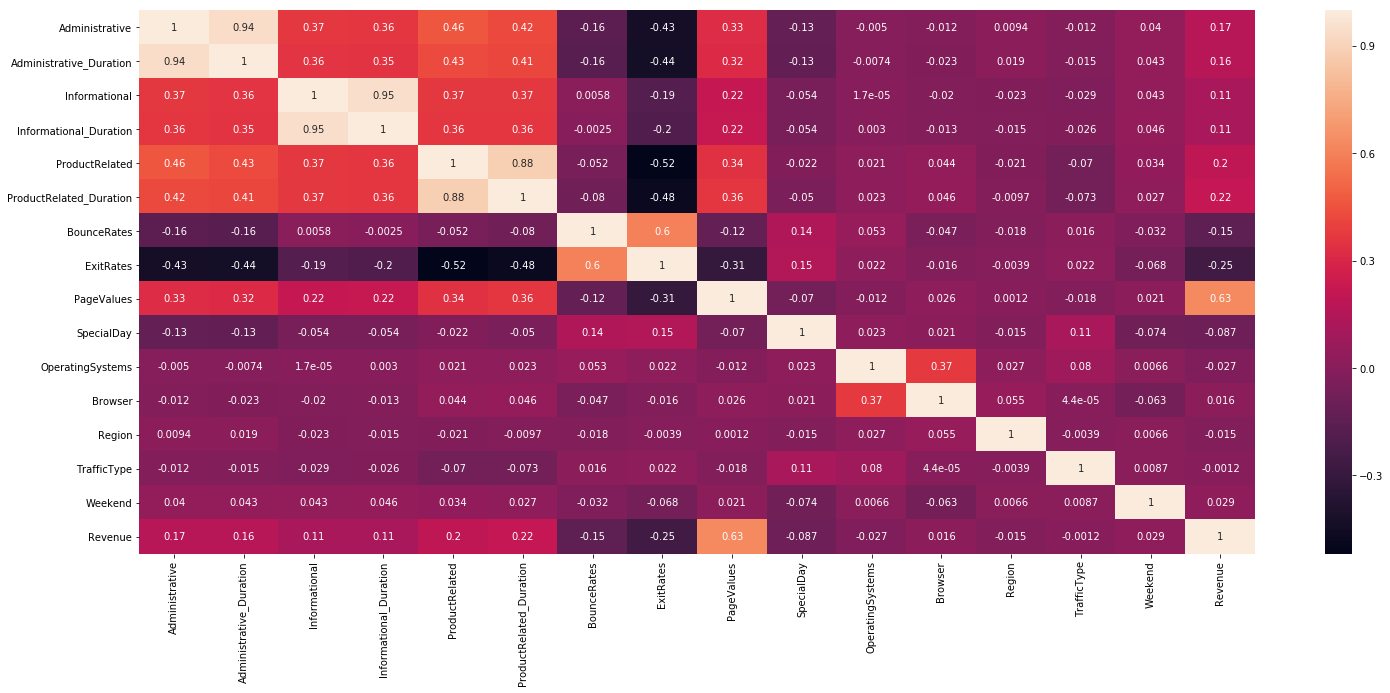

In [7]:
# Correlation Heatmap for the dataframe
spearman =df.corr(method ='spearman')
plt.figure(figsize=(25,10))
sns.heatmap(spearman, annot=True)

In [8]:
numerical_list=['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType']
sns.pairplot(df[numerical_list],corner=True)

TypeError: pairplot() got an unexpected keyword argument 'corner'

In [ ]:
import plotly.express as px
fig = px.scatter(df, x="PageValues", y="Administrative",facet_col="Revenue", color="TrafficType", trendline="ols")
fig.show()

In [9]:
import plotly.express as px
fig = px.scatter(df, x="PageValues", y="BounceRates",facet_col="Revenue", color="TrafficType", trendline="ols")
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [10]:
import plotly.express as px
fig2 = px.scatter(df, x="PageValues", y="ExitRates",facet_col="Revenue", color="Region", trendline="ols")
fig2.show()

ModuleNotFoundError: No module named 'plotly'

In [11]:
import plotly.express as px
fig2 = px.scatter(df, x="BounceRates", y="ExitRates",facet_col="Revenue", color="Region", trendline="ols")
fig2.show()

ModuleNotFoundError: No module named 'plotly'

### Observations
----------------------------------------------------------------------

##### We observed the following high correlations:
    - The duration attributes may need to be assesed for elimination in the final model as each is very highly correlated with its corresponding non-duration attribute.
    
    - Administrative & ProductRelated have a correlation of 0.46; this merits further investigation and possible feature engineering.
    - Administrative & ProductRelated_Duration have a correlation of 0.42; this merits further investigation and possible feature engineering.
    - Administrative & ExitRates have a correlation of -0.43; this merits further investigation and possible feature engineering.
 
    - Administrative_Duration & ExitRates have a correlation of -0.44; this merits further investigation and possible feature engineering.
    - Administrative_Duration & ProductRelated have a correlation of 0.43; this merits further investigation and possible feature engineering.
    - Administrative_Duration & ProductRelated_Duration have a correlation of 0.41; this merits further investigation and possible feature engineering. 

    - ProductRelated & ExitRates have a correlation of -0.52; this merits further investigation and possible feature engineering.
 
    - ProductRelated_Duration & ExitRates have a correlation of -0.48; this merits further investigation and possible feature engineering.
    
    - BounceRate & ExitRates have a correlation of 0.6; this merits further investigation and possible feature engineering.

    - ProductRelated & ExitRates have a correlation of -0.52; this merits further investigation and possible feature engineering.
    
    - PageValues & Revenue have a correlation of 0.63; As Revenue is the target we would expect PageValues to be a useful attribute in our model.

#### _4. Prelimiary EDA Visualizations:_

In [12]:
profile = ProfileReport(df)
profile

NameError: name 'ProfileReport' is not defined

### Observations for Preliminary EDA/Visualizations:
----------------------------------------------------------------------

##### **Warnings – highlights:**
    -High correlation between Exit Rates and BounceRates, which we noted in the correlation map.
    -Dataset has 125 duplicate rows, which we decided to allow given that there are no unique identifiers that we could use to verify whether the apparently duplicate entries (~1% of the data) were bogus or legitimate.

##### **Variables – highlights:**

    - Administrative is a count between 0 and 27; it is right skewed (with ~66% of the dataset in 0, 1, 2)
    - Administrative_duration captures time spent; it also is right skewed with almost 50% of the data being zero (which makes sense because almost 50% of the data in Administrative is zero)

    - Informational is a count between 0 and 24; it is right skewed (with ~90% of the dataset in 0, 1, 2)
    - Informational_duration captures time spent; it also is right skewed with over 80% of the data being zero (which makes sense because over 78% of the data in Informational is zero)

    - ProductRelated is a count between 0 and 705; it is right skewed (however; only ~12% of the dataset is in 0, 1, 2)
    - ProductRelated_duration captures time spent; it also is right skewed with almost 6% of the data being zero (which makes sense because only 12% of the data in ProductRelated is zero)

    - BounceRate captures the percentage of visits in which a visitor exits the landing page without browsing any further. It is right skewed, with about 45% of the data being a value of 0. Given that those who “bounce” will certainly not buy, this attribute may well be an important variable in our model. (Note: ExitRate, which is highly correlated with BounceRate, also is likely to have a similar skewness, distribution and importance in predicting online shoppers’ purchasing behavior.)

    - PageValues are dollar amounts – more or less – amounting to sales amounts, divided by page views. The variable is right skewed with approximately 78% of PageValues being zero; this makes sense because about 45% of customers “bounce” immediately, buying nothing, leaving another ~30% to browse without completing a purchase.

    - SpecialDay is a binary variable with 0 for not near a holiday/special day and 1 for near a holiday/special day. The variable is right skewed with approximately 90% of the data being zero (i.e., transaction not occurring near a holiday/special day). This information suggests to us that we are dealing with a unique retail environment (i.e., most retailers experience increased activity at/during holiday times).

    - Month – is the month of the year in which the transaction occurred. We first noted that the dataset is devoid of transactions in January and April. Thus, the dataset does not appear to contain a full year of information, which could impair our ability to complete the analysis in light of potential seasonality. The most popular months for online browsing/shopping are: May (27.3%), November (24.3%), March (15.5%) and December 14.0%). Low months include: June-October, perhaps because           folks are not browsing/shopping online during the warmer months.

    - OperatingSystems – is a categorical variable and most of the data (~95%) is in one of three operating systems (2, 1, 3). 

    - Browser – is a categorical variable and most the data (~91%) come from three browsers (2, 1, 4).

    - Region – is a categorical variable for the region from which the visitor came. The top four account for ~77% of the data (i.e., regions 1, 3, 4, 2).

    - TrafficType – is a categorical variable to indicate how the visitor arrived at the website. The top three account for approximately 67% of the referrals (i.e., types 2, 1, 3).

    - VisitorType – is a categorical variable. Most visitors (~86%) are return visitors. A few visitors have been classified as “Other”; however, they should not be so classified as the categories of “Returning_visitor” and “New_visitor” should capture all visitors (i.e., a visitor is either one or the other).

    - Weekend – is a categorical variable to capture whether the visitor is visiting the site on a weekend. Approximately 77% of the visits took place during the week, which makes sense in light of the proportion of weekdays in a week (i.e., 5/7 = 71.4%).

    - Revenue – is the target variable. It is a categorical variable. It is imbalanced – as approximately 85% of the visits resulted in “no sale” (i.e., only ~15% of the visits resulted in sales). As such, we will need to balance the data later.


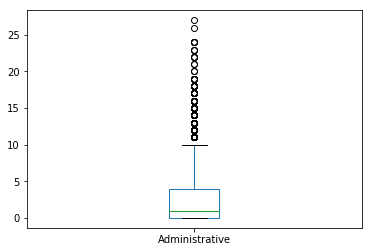

In [13]:
# Add Box Plots to further Describe the Data
# For Administrative
df_p=df.iloc[:,0]
df_p.plot.box()

In [14]:
# The group decided not to further consider the outliers above because the values are neither excessisvely extreme nor are they outside a reasonable range.

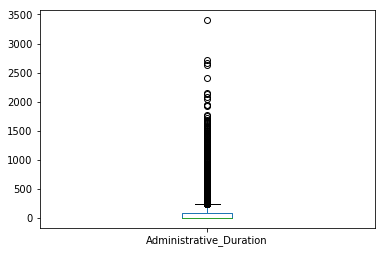

In [15]:
# For Administrative_Duration
df_p=df.iloc[:,1]
df_p.plot.box()

In [16]:
# The group decided not to further consider the outliers because there is an extrordinary amount of them.

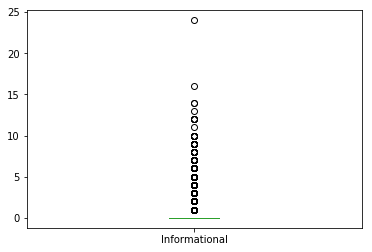

In [17]:
# For Informational
df_p=df.iloc[:,2]
df_p.plot.box()

In [18]:
# The group decided not to further consider the outliers because the values are neither excessisvely extreme nor are they outside a reasonable range.

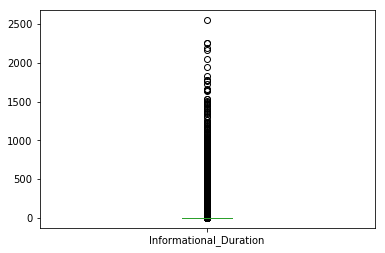

In [19]:
# For Informational_Duration
df_p=df.iloc[:,3]
df_p.plot.box()

In [20]:
# The group decided not to further consider the outliers because there is an extrordinary amount of them.

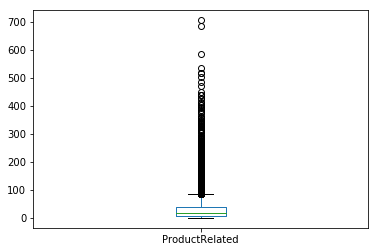

In [21]:
# For ProductRelated
df_p=df.iloc[:,4]
df_p.plot.box()

In [22]:
# The group decided not to further consider the outliers because there is an extrordinary amount of them.

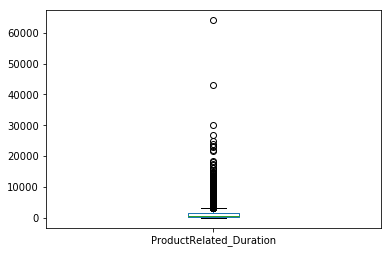

In [23]:
# For ProductRelated_Duration
df_p=df.iloc[:,5]
df_p.plot.box()

In [24]:
# The group decided not to further consider the outliers because there is an extrordinary amount of them.

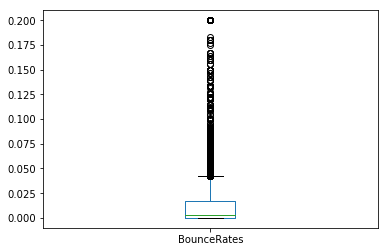

In [25]:
# For BounceRates
df_p=df.iloc[:,6]
df_p.plot.box()

In [26]:
# The group decided not to further consider the outliers because there is an extrordinary amount of them and the outlier values are not outside the range of 0-1.

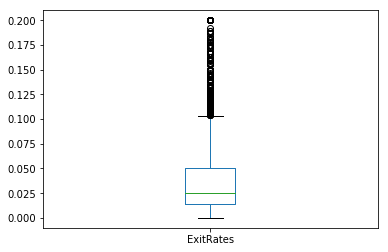

In [27]:
# For ExitRates
df_p=df.iloc[:,7]
df_p.plot.box()

In [28]:
# The group decided not to further consider the outliers because there is an extrordinary amount of them and the outlier values are not outside the range of 0-1.

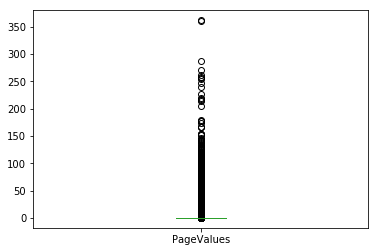

In [29]:
# For PageValues
df_p=df.iloc[:,8]
df_p.plot.box()

In [30]:
# The group decided not to further consider the outliers because there is an extrordinary amount of them
# and even the most extreme value of $350+ is reasonable considering the definition of the attribute.

### C. Data Quality Improvment Strategies
#### _1. Overview:_
Given the noted missing/erroneous values we have formulated the following pipeline for understanding and preparing our data.

We will complete the following pipeline step in the data understanding phase:

        1. Imputation 
           - We will replace VisitorType "Other" with the mode "Returning_Visitor"

We will complete the following pipeline steps in the data preparation phase:
       
       1. Feature Engineering
           - Created 5 new variables (Admin_per_Exit; Bounce_Exit_Rate_Avg; Bounce_per_Exit_Rate; Total_Duration; Total_Duration_Avg)
           - Binned 4 categorical variables to reduce the number of categories to five or fewer (Operating, Browser, Region and TrafficType) 
           - Encoded VisitorType, Month, Weekend, and Revenue using OneHot Encoding
       
       2. Outlier Detection
           - IQR Outlier Detection: We use the IQR to adjust issues with two of the created variables (Admin_per_Exit)
           
       3. Normalization
          - utilized quantile_transform method
          - utilized PowerTransformer as a secondary method
       
       4. Standardization
           a. Min-Max Scaler
           b. Z-Score Standardization
              - We initially omit this step due to using the Min-Max Scaler method
           c. Standard Deviation Outlier
              - We initially omit this step due to addressing outliers via IQR

In [31]:
# Pipeline - Imputation:

## Replace the VisitorType 'Other' with the variable's mode, namely: 'Returning_Visitor'
df['VisitorType'] = df['VisitorType'].replace('Other','Returning_Visitor')
df.groupby('VisitorType').count()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
VisitorType,,,,,,,,,,,,,,,,,
New_Visitor,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694
Returning_Visitor,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636


In [32]:
impute1_list =['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']

# Impute Zeros before doing the log
for column in impute1_list:
    df[column] = df[column] + 1

display(df.sample(20))

# df['PageValues'] = df['PageValues'] + 1

df['PageValues_Log'] = np.log(df['PageValues'])
df['PageValues_Log10'] = np.log10(df['PageValues'])

df[['PageValues_Log','PageValues_Log10']]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1012,1,1.00000,1,1.0,3,93.000000,1.000000,1.100000,1.000000,0.0,Mar,2,2,8,1,Returning_Visitor,False,False
7313,6,47.80000,1,1.0,34,744.266667,1.005000,1.021667,1.000000,0.0,Nov,2,2,4,1,Returning_Visitor,True,False
7506,3,153.20000,1,1.0,29,495.880000,1.000000,1.013793,1.000000,0.0,Sep,1,8,7,1,New_Visitor,False,False
10340,4,37.00000,3,17.0,75,4378.708157,1.020000,1.029309,1.000000,0.0,Nov,1,2,3,2,Returning_Visitor,False,True
11664,2,1.00000,4,83.0,121,2896.129762,1.001626,1.005813,17.963171,0.0,Nov,1,2,1,11,Returning_Visitor,False,True
11025,4,216.00000,1,1.0,54,1482.429167,1.001852,1.012346,57.317601,0.0,Nov,1,8,1,11,Returning_Visitor,True,True
5652,5,195.40000,1,1.0,13,183.514286,1.000000,1.001667,1.000000,0.0,Oct,1,1,6,2,Returning_Visitor,False,False
2870,1,1.00000,1,1.0,6,109.000000,1.000000,1.080000,1.000000,0.0,May,2,2,3,13,Returning_Visitor,False,False
3292,1,1.00000,1,1.0,43,841.833333,1.000000,1.019048,1.000000,0.0,May,2,2,2,3,Returning_Visitor,False,False
11848,4,87.75000,3,52.0,12,146.666667,1.007692,1.023077,1.000000,0.0,Dec,1,1,1,2,New_Visitor,False,False


,PageValues_Log,PageValues_Log10
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
12325,2.583372,1.121944
12326,0.000000,0.000000
12327,0.000000,0.000000
12328,0.000000,0.000000


In [33]:
# Check to see if there are any inf values or N/As
display(df[['PageValues_Log','PageValues_Log10']].describe())
display(df[['PageValues_Log','PageValues_Log10']].isna().sum())

,PageValues_Log,PageValues_Log10
count,12330.000000,12330.000000
mean,0.624125,0.271054
std,1.267818,0.550606
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,5.893752,2.559624


PageValues_Log      0
PageValues_Log10    0
dtype: int64

# Part III: Data Preparation  <a name="part3"></a>

### A. Overview
Data Preparation includes preprocessing steps for selecting data (e.g., including feature engineering/binning) and cleaning data (e.g., recoding for any "new" features created; normalizing; handling outliers; dealing with skewness; standardizing; reviewing correlations to identify highly related/correlated features that s/b avoided in the analysis).

## 1. Selecting Data
    a. Feature Engineering

In [34]:
# Relationship of rates or duration / page value, compare to y
# Weighted Avg Bounce & Exit rate
# Pipeline - Feature Engineering:
# Created 5 new variables (Admin_per_Exit; Bounce_Exit_Rate_Avg; Bounce_per_Exit_Rate; Total_Duration; Total_Duration_Avg)


#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Admin_per_Exit'] = df['Administrative'] / df['ExitRates']
df['Admin_per_Bounce'] = df['Administrative'] / df['BounceRates']

#Create 'Bounce_Exit_Rate_Avg' to enable us to retain two highly correlated variables (i.e., 'BounceRates' and 'ExitRates') since both are highly correlated with the target
df['Bounce_Exit_Rate_Avg'] = (df['BounceRates'] + df['ExitRates'])/2
df['Bounce_Exit_Rate_WeightedAvg'] = ((df['BounceRates']*.6) + (df['ExitRates']*.4))

#Create 'Bounce_per_Exit_Rate' to enable us to retain two highly correlated variables (i.e., 'BounceRates' and 'ExitRates') since both are highly correlated with the target
df['Bounce_per_Exit_Rate'] = df['BounceRates'] / df['ExitRates']


#Create 'Total_Duration' and 'Total_Duration_Avg' to enable us to assess total and average duration, respectively.
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['Total_Duration_Avg'] = (df['Total_Duration'])/3
df['Admin_Duration_percent_TotalDuration'] = df['Administrative_Duration'] / df['Total_Duration']
df['Info_Duration_percent_TotalDuration'] = df['Informational_Duration'] / df['Total_Duration']
df['Product_Duration_percent_TotalDuration'] = df['ProductRelated_Duration'] / df['Total_Duration']
df['TotalDuration_per_PageValues'] = df['Total_Duration'] / df['PageValues']


#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Admin_per_PageValues'] = df['Administrative'] / df['PageValues']
df['AdminDuration_per_PageValues'] = df['Administrative_Duration'] / df['PageValues']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Informational_per_PageValues'] = df['Informational'] / df['PageValues']
df['Info_Duration_per_PageValues'] = df['Informational_Duration'] / df['PageValues']


#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['ProductRelated_per_PageValues'] = df['ProductRelated'] / df['PageValues']
df['Product_Duration_per_PageValues'] = df['ProductRelated_Duration'] / df['PageValues']


#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Exit_per_PageValues'] = df['ExitRates'] / df['PageValues']


#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Bounce_per_PageValues'] = df['BounceRates'] / df['PageValues']


calcualted_cols = ['Admin_per_Exit', 'Admin_per_Bounce', 'Bounce_Exit_Rate_Avg', 'Bounce_Exit_Rate_WeightedAvg', 'Bounce_per_Exit_Rate', 'Total_Duration','Total_Duration_Avg','Admin_Duration_percent_TotalDuration',\
           'Info_Duration_percent_TotalDuration','Product_Duration_percent_TotalDuration','TotalDuration_per_PageValues', 'Admin_per_PageValues', 'AdminDuration_per_PageValues', 'Informational_per_PageValues',\
           'Info_Duration_per_PageValues','ProductRelated_per_PageValues', 'Product_Duration_per_PageValues', 'Exit_per_PageValues', 'Bounce_per_PageValues','Revenue']

display(df[calcualted_cols].sample(20))


# display(df[['Administrative', 'ExitRates', 'Admin_per_Exit', 'BounceRates', 'Bounce_Exit_Rate_Avg', 'Bounce_per_Exit_Rate',\
#            'Administrative_Duration','Informational_Duration', 'ProductRelated_Duration', 'Total_Duration', 'Total_Duration_Avg']].sample(20))

,Admin_per_Exit,Admin_per_Bounce,Bounce_Exit_Rate_Avg,Bounce_Exit_Rate_WeightedAvg,Bounce_per_Exit_Rate,Total_Duration,Total_Duration_Avg,Admin_Duration_percent_TotalDuration,Info_Duration_percent_TotalDuration,Product_Duration_percent_TotalDuration,TotalDuration_per_PageValues,Admin_per_PageValues,AdminDuration_per_PageValues,Informational_per_PageValues,Info_Duration_per_PageValues,ProductRelated_per_PageValues,Product_Duration_per_PageValues,Exit_per_PageValues,Bounce_per_PageValues,Revenue
8562,1.800000,1.875000,1.088889,1.084444,0.960000,798.000000,266.000000,0.001253,0.001253,0.997494,798.000000,2.000000,1.000000,1.000000,1.000000,5.000000,796.000000,1.111111,1.066667,False
12070,3.949731,4.000000,1.006364,1.005091,0.987433,363.125000,121.041667,0.329088,0.002754,0.668158,363.125000,4.000000,119.500000,1.000000,1.000000,12.000000,242.625000,1.012727,1.000000,False
6543,5.678975,5.808581,1.044742,1.042384,0.977687,972.013115,324.004372,0.180347,0.001029,0.818624,972.013115,6.000000,175.300000,1.000000,1.000000,40.000000,795.713115,1.056529,1.032955,False
398,0.833333,0.833333,1.200000,1.200000,1.000000,3.000000,1.000000,0.333333,0.333333,0.333333,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.200000,1.200000,False
8281,11.681748,11.863329,1.019382,1.017810,0.984694,6516.490406,2172.163469,0.056183,0.010205,0.933612,6516.490406,12.000000,366.116667,5.000000,66.500000,150.000000,6083.873739,1.027244,1.011520,False
11924,0.992720,1.000000,1.003667,1.002933,0.992720,904.288889,301.429630,0.001106,0.001106,0.997788,25.727725,0.028451,0.028451,0.028451,0.028451,0.881974,25.670824,0.028659,0.028451,True
3618,1.975309,2.000000,1.006250,1.005000,0.987654,578.666667,192.888889,0.190092,0.001728,0.808180,578.666667,2.000000,110.000000,1.000000,1.000000,10.000000,467.666667,1.012500,1.000000,False
9619,3.909544,3.977798,1.014359,1.012604,0.982841,810.681935,270.227312,0.088197,0.001234,0.910569,810.681935,4.000000,71.500000,1.000000,1.000000,45.000000,738.181935,1.023137,1.005581,False
6015,0.990712,0.995851,1.006771,1.006250,0.994840,3028.333333,1009.444444,0.000330,0.000330,0.999340,3028.333333,1.000000,1.000000,1.000000,1.000000,49.000000,3026.333333,1.009375,1.004167,False
3322,0.987654,1.000000,1.006250,1.005000,0.987654,169.250000,56.416667,0.005908,0.005908,0.988183,169.250000,1.000000,1.000000,1.000000,1.000000,9.000000,167.250000,1.012500,1.000000,False


In [35]:
# # Relationship of rates or duration / page value, compare to y
# # Weighted Avg Bounce & Exit rate
# # Pipeline - Feature Engineering:
# # Created 5 new variables (Admin_per_Exit; Bounce_Exit_Rate_Avg; Bounce_per_Exit_Rate; Total_Duration; Total_Duration_Avg)


# #Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
# df['Admin_per_Exit'] = df['Administrative'] / df['ExitRates']
# df['Admin_per_Bounce'] = df['Administrative'] / df['BounceRates']

# #Create 'Bounce_Exit_Rate_Avg' to enable us to retain two highly correlated variables (i.e., 'BounceRates' and 'ExitRates') since both are highly correlated with the target
# df['Bounce_Exit_Rate_Avg'] = (df['BounceRates'] + df['ExitRates'])/2
# df['Bounce_Exit_Rate_WeightedAvg'] = ((df['BounceRates']*.6) + (df['ExitRates']*.4))

# #Create 'Bounce_per_Exit_Rate' to enable us to retain two highly correlated variables (i.e., 'BounceRates' and 'ExitRates') since both are highly correlated with the target
# df['Bounce_per_Exit_Rate'] = df['BounceRates'] / df['ExitRates']


# #Create 'Total_Duration' and 'Total_Duration_Avg' to enable us to assess total and average duration, respectively.
# df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
# df['Total_Duration_Avg'] = (df['Total_Duration'])/3
# df['Admin_Duration_percent_TotalDuration'] = df['Administrative_Duration'] / df['Total_Duration']
# df['Info_Duration_percent_TotalDuration'] = df['Informational_Duration'] / df['Total_Duration']
# df['Product_Duration_percent_TotalDuration'] = df['ProductRelated_Duration'] / df['Total_Duration']
# df['TotalDuration_per_PageValues_Log'] = df['Total_Duration'] / df['PageValues_Log']


# #Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
# df['Admin_per_PageValuesLog'] = df['Administrative'] / df['PageValues_Log']
# df['AdminDuration_per_PageValuesLog'] = df['Administrative_Duration'] / df['PageValues_Log']

# #Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
# df['Informational_per_PageValuesLog'] = df['Informational'] / df['PageValues_Log']
# df['Info_Duration_per_PageValuesLog'] = df['Informational_Duration'] / df['PageValues_Log']


# #Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
# df['ProductRelated_per_PageValuesLog'] = df['ProductRelated'] / df['PageValues_Log']
# df['Product_Duration_per_PageValuesLog'] = df['ProductRelated_Duration'] / df['PageValues_Log']


# #Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
# df['Exit_per_PageValuesLog'] = df['ExitRates'] / df['PageValues_Log']


# #Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
# df['Bounce_per_PageValuesLog'] = df['BounceRates'] / df['PageValues_Log']


# calcualted_cols = ['Admin_per_Exit', 'Admin_per_Bounce', 'Bounce_Exit_Rate_Avg', 'Bounce_Exit_Rate_WeightedAvg', 'Bounce_per_Exit_Rate', 'Total_Duration','Total_Duration_Avg','Admin_Duration_percent_TotalDuration',\
#            'Info_Duration_percent_TotalDuration','Product_Duration_percent_TotalDuration','TotalDuration_per_PageValues_Log', 'Admin_per_PageValuesLog', 'AdminDuration_per_PageValuesLog', 'Informational_per_PageValuesLog',\
#            'Info_Duration_per_PageValuesLog','ProductRelated_per_PageValuesLog', 'Product_Duration_per_PageValuesLog', 'Exit_per_PageValuesLog', 'Bounce_per_PageValuesLog','Revenue']

# display(df[calcualted_cols].sample(20))


# # display(df[['Administrative', 'ExitRates', 'Admin_per_Exit', 'BounceRates', 'Bounce_Exit_Rate_Avg', 'Bounce_per_Exit_Rate',\
# #            'Administrative_Duration','Informational_Duration', 'ProductRelated_Duration', 'Total_Duration', 'Total_Duration_Avg']].sample(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
Admin_per_Exit                            12330 non-null float64
Admin_per_Bounce                          12330 non-null float64
Bounce_Exit_Rate_Avg                      12330 non-null float64
Bounce_Exit_Rate_WeightedAvg              12330 non-null float64
Bounce_per_Exit_Rate                      12330 non-null float64
Total_Duration                            12330 non-null float64
Total_Duration_Avg                        12330 non-null float64
Admin_Duration_percent_TotalDuration      12330 non-null float64
Info_Duration_percent_TotalDuration       12330 non-null float64
Product_Duration_percent_TotalDuration    12330 non-null float64
TotalDuration_per_PageValues              12330 non-null float64
Admin_per_PageValues                      12330 non-null float64
AdminDuration_per_PageValues              12330 non-null float64
Informational_per_PageValues              1233

Admin_per_Exit                            0.0
Admin_per_Bounce                          0.0
Bounce_Exit_Rate_Avg                      0.0
Bounce_Exit_Rate_WeightedAvg              0.0
Bounce_per_Exit_Rate                      0.0
Total_Duration                            0.0
Total_Duration_Avg                        0.0
Admin_Duration_percent_TotalDuration      0.0
Info_Duration_percent_TotalDuration       0.0
Product_Duration_percent_TotalDuration    0.0
TotalDuration_per_PageValues              0.0
Admin_per_PageValues                      0.0
AdminDuration_per_PageValues              0.0
Informational_per_PageValues              0.0
Info_Duration_per_PageValues              0.0
ProductRelated_per_PageValues             0.0
Product_Duration_per_PageValues           0.0
Exit_per_PageValues                       0.0
Bounce_per_PageValues                     0.0
Revenue                                   0.0
dtype: float64

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,Admin_per_Exit,Admin_per_Bounce,Bounce_Exit_Rate_Avg,Bounce_Exit_Rate_WeightedAvg,Bounce_per_Exit_Rate,Total_Duration,Total_Duration_Avg,Admin_Duration_percent_TotalDuration,Info_Duration_percent_TotalDuration,Product_Duration_percent_TotalDuration,TotalDuration_per_PageValues,Admin_per_PageValues,AdminDuration_per_PageValues,Informational_per_PageValues,Info_Duration_per_PageValues,ProductRelated_per_PageValues,Product_Duration_per_PageValues,Exit_per_PageValues,Bounce_per_PageValues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,3.228636,3.280392,1.032632,1.030544,0.980148,1313.037228,437.679076,0.102382,0.042677,0.854941,860.176753,2.255419,51.654813,1.109420,20.496057,22.041311,788.025883,0.840518,0.822376
std,3.273953,3.311695,0.047475,0.047507,0.018478,2037.801702,679.267234,0.156795,0.101348,0.209569,1576.275573,2.598377,136.885805,1.052444,102.808584,33.555792,1486.393109,0.399859,0.391126
min,0.833333,0.833333,1.000000,1.000000,0.833333,3.000000,1.000000,0.000058,0.000053,0.001843,0.381212,0.002763,0.002763,0.002757,0.002757,0.026103,0.173649,0.002776,0.002757
25%,0.962567,0.995671,1.007906,1.006667,0.973727,225.000000,75.000000,0.003318,0.001024,0.818182,88.516933,1.000000,1.000000,1.000000,1.000000,4.000000,73.005044,1.004167,1.000000
50%,1.935484,1.980831,1.015851,1.013333,0.984654,683.000000,227.666667,0.027028,0.003003,0.954556,362.043221,1.000000,1.055314,1.000000,1.000000,11.000000,306.224167,1.021959,1.000000
75%,4.810467,4.916785,1.032542,1.028170,0.992027,1629.908333,543.302778,0.133984,0.017544,0.992063,1017.400968,3.000000,48.500000,1.000000,1.000000,26.000000,915.432359,1.048333,1.014690
max,27.740709,27.941341,1.200000,1.200000,1.059843,69924.647230,23308.215743,0.996313,0.966102,0.999842,69924.647230,25.000000,3399.750000,17.000000,2550.375000,597.053581,63974.522230,1.200000,1.200000


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


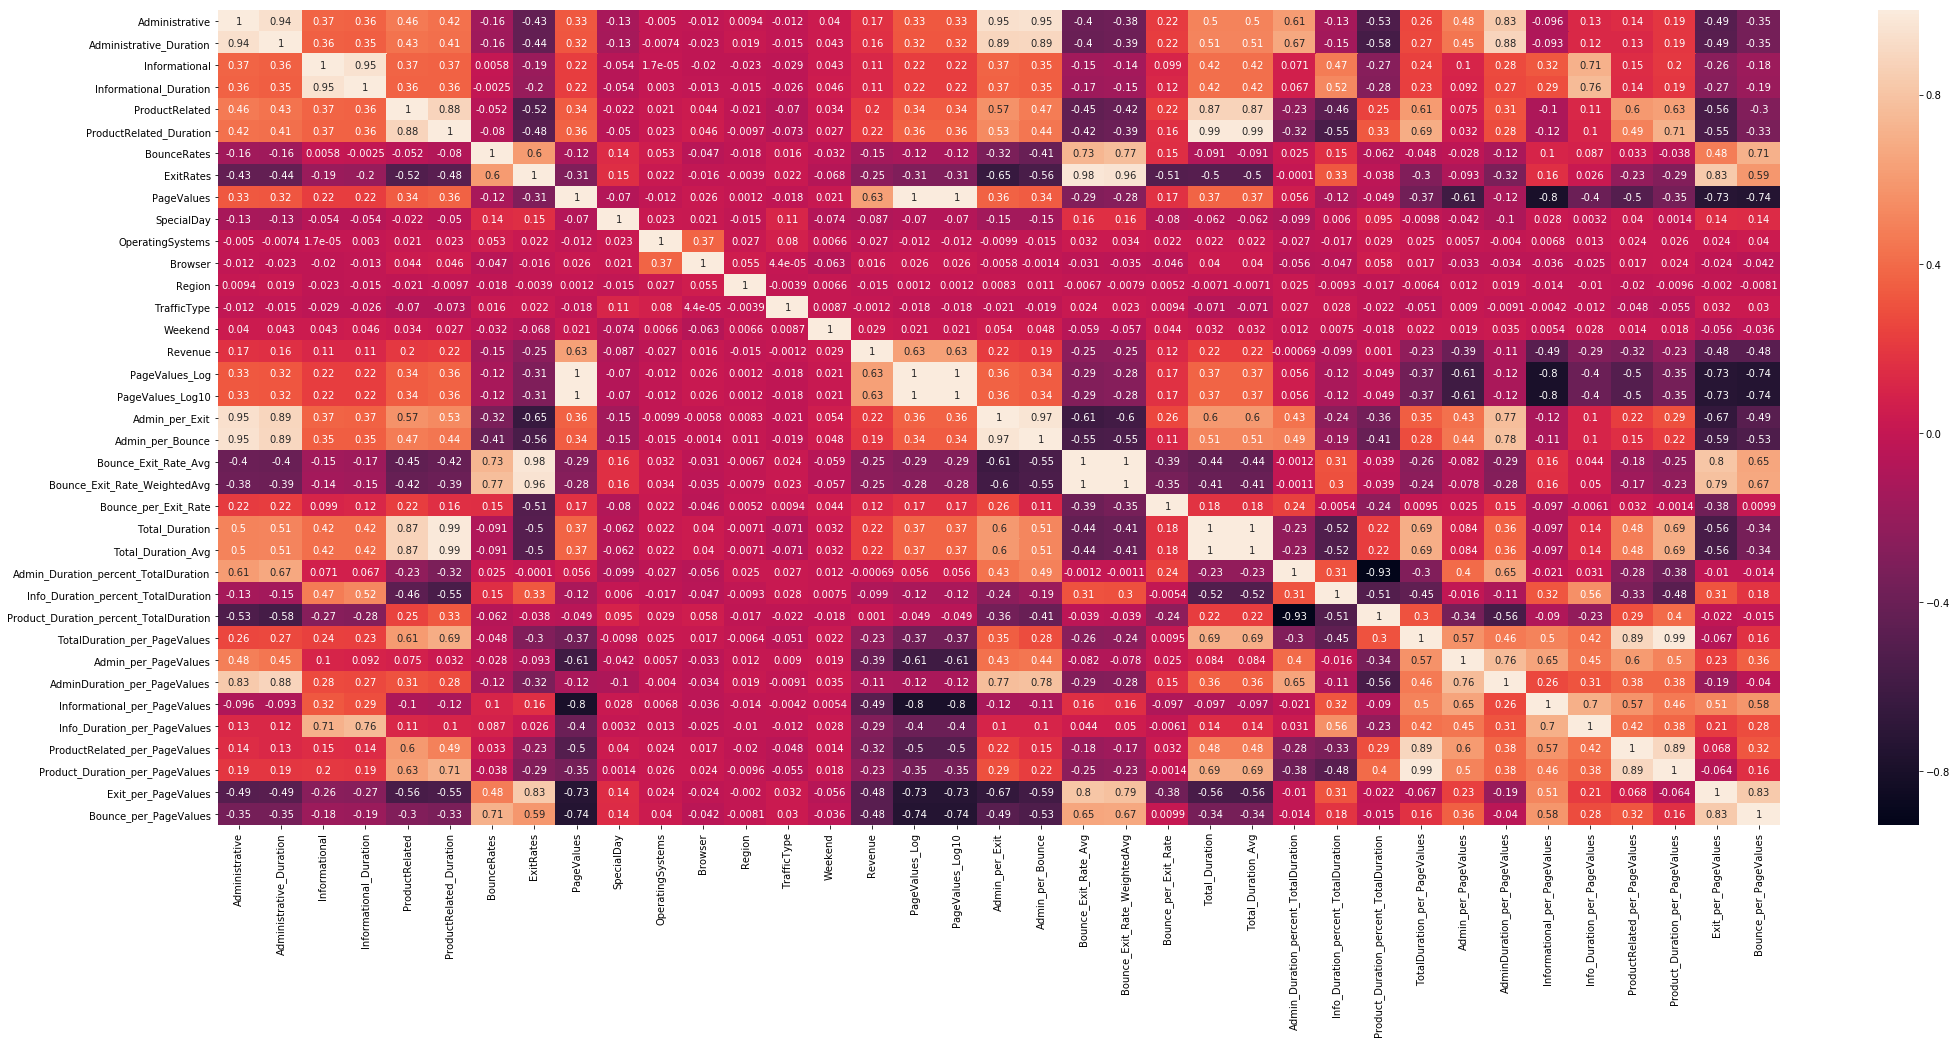

In [36]:
df[calcualted_cols].info()
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
display(df[calcualted_cols].isna().mean().round(4) * 100)
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
display(df[calcualted_cols].describe())
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
# Correlation Heatmap for the dataframe
spearman_calculated =df.corr(method ='spearman')
plt.figure(figsize=(35,15))
sns.heatmap(spearman_calculated, annot=True)

In [37]:
# # Drop calcualted columns with more than 20% missing values 
# df.drop(['Admin_per_Bounce','Admin_per_PageValuesLog','AdminDuration_per_PageValuesLog','Informational_per_PageValuesLog','Info_Duration_per_PageValuesLog','Bounce_per_PageValuesLog' ],axis=1, inplace = True)
# # check to see if the correct column droped
# display(df.isna().mean().round(4) * 100)

In [38]:
#Results indicate that create values created for Admin_per_Exit and Bounce_per_Exit_Rate have some missing values; further exploration
# df[['Admin_per_Exit', 'Bounce_per_Exit_Rate']].describe()

    b. Data Imputation

In [39]:
# # Mean imputation

# ## Impute mean values for mising values in Admin_per_Exit
# df['Admin_per_Exit'].fillna(df['Admin_per_Exit'].mean(), inplace=True)


# ## Impute mean values for missing values in Bounce_per_Exit_Rate
# df['Bounce_per_Exit_Rate'].fillna(df['Bounce_per_Exit_Rate'].mean(), inplace=True)

# ## Check the df
# df.isnull().sum()


In [40]:
# In light of the above, Admin_per_Exit and Bpounce_per_Exit_Rate need imputation to address NaN and mising values.

In [41]:
print(df.groupby('Month')['SpecialDay'].sum())

Month
Aug       0.0
Dec       0.0
Feb      43.0
Jul       0.0
June      0.0
Mar       0.0
May     714.4
Nov       0.0
Oct       0.0
Sep       0.0
Name: SpecialDay, dtype: float64


In [42]:
print(df.groupby(['SpecialDay','Month']).count())

                  Administrative  Administrative_Duration  Informational  \
SpecialDay Month                                                           
0.0        Aug               433                      433            433   
           Dec              1727                     1727           1727   
           Feb               105                      105            105   
           Jul               432                      432            432   
           June              288                      288            288   
           Mar              1907                     1907           1907   
           May              2192                     2192           2192   
           Nov              2998                     2998           2998   
           Oct               549                      549            549   
           Sep               448                      448            448   
0.2        Feb                15                       15             15   
           M

In [43]:
df[['SpecialDay','Month']].sample(20)

,SpecialDay,Month
3386,0.0,May
405,0.0,Mar
8841,0.0,Dec
8281,0.0,Nov
5601,0.0,June
11517,0.0,Nov
11008,0.0,Dec
11995,0.0,Nov
1322,0.0,Mar
8375,0.0,Nov


    c. Binning

In [44]:
# Pipeline - Binning:

##Reduce categories for Operating Systems to the top 3 plus "other"
### Operating Systems – is a categorical variable and most of the data (~95%) is in one of three operating systems (2, 1, 3). 
def binning_operating_systems(B):
    if (B <= 3):
        return(B)
    else:
        return(4) # creating a category of 4 for all Operating Systems > 3

df['OperatingSystems_Bin']=df['OperatingSystems'].apply(binning_operating_systems)   # Creating a new column in the df


      
##Reduce categories for Browser to the top 3 plus "other"
### Browser – is a categorical variable and most the data (~91%) come from three browsers (2, 1, 4).
def binning_browser(B):
    if (B == 3) or (B > 4): 
        return(3) 
    else:
        return(B) 

df['Browser_Bin']=df['Browser'].apply(binning_browser)   # Creating a new column in the df
      
      
##Reduce categories for Region to the top 4 plus "other"
### Region – is a categorical variable for region from which the visitor came. The top four account for ~77% of the data (i.e., region 1, 3, 4, 2).
def binning_region(B):
    if (B <= 4):
        return(B)
    else:
        return(5) # creating a category of 5 for all Regions > 4

df['Region_Bin']=df['Region'].apply(binning_region)   # Creating a new column in the df

      
      
##Reduce categories for TrafficType to the top 3 plus "other"
### TrafficType – is a categorical variable to indicate how visitor arrived at website. The top three account for approximately 67% of the referrals (i.e., types 2, 1, 3).
def binning_traffic_type(B):
    if (B <= 3):
        return(B)
    else:
        return(4) # creating a category of 4 for all Traffic Types > 3

df['TrafficType_Bin']=df['TrafficType'].apply(binning_traffic_type)   # Creating a new column in the df


##Create holiday/non-holiday bin for Feb/May = Holiday; others = Non-holiday
### Months – is a boolean variable to the month of the internet visits. 
def holiday_bin_func(month) :
    if month == 'May':
        return int(1)
    elif month == 'Feb':
        return int(1)
    else:
        return int(0)
    
df['Holiday_Bin'] = df['Month'].apply(holiday_bin_func)

## Try binning into 2 categories, 1 busy months and 0 is less busy
##Reduce months to the top 4 in which there are transactions and "other"
### Months – is a boolean variable to the month of the internet visits. The top four months(May, November, March and December, respectively) account for almost  three account for approximately 80% of visits.
def month_bin_func(month) :
    if month == 'May':
        return int(5)
    elif month == 'Nov':
        return int(11)
    elif month == 'Mar':
        return int(3)
    elif month == 'Dec':
        return int(12)
    else:
        return int(0)
    
df['Month_Bin'] = df['Month'].apply(month_bin_func)

def month_func(month) :
    if month == 'Jan':
        return int(1)
    elif month == 'Feb':
        return int(2)
    elif month == 'Mar':
        return int(3)
    elif month == 'Apr':
        return int(4)
    elif month == 'May':
        return int(5)
    elif month == 'June':
        return int(6)
    elif month == 'Jul':
        return int(7)
    elif month == 'Aug':
        return int(8)
    elif month == 'Sep':
        return int(9)
    elif month == 'Oct':
        return int(10)
    elif month == 'Nov':
        return int(11)
    elif month == 'Dec':
        return int(12)

df['Month'] = df['Month'].apply(month_func)

display(df[['OperatingSystems', 'OperatingSystems_Bin', 'TrafficType', 'TrafficType_Bin', 'Browser', 'Browser_Bin', 'Region', 'Region_Bin', 'Month', 'Month_Bin','SpecialDay','Holiday_Bin']].sample(20))


,OperatingSystems,OperatingSystems_Bin,TrafficType,TrafficType_Bin,Browser,Browser_Bin,Region,Region_Bin,Month,Month_Bin,SpecialDay,Holiday_Bin
5833,2,2,2,2,2,2,3,3,10,0,0.0,0
8994,2,2,8,4,2,2,4,4,11,11,0.0,0
5393,3,3,2,2,2,2,2,2,5,5,0.0,1
1502,3,3,1,1,2,2,8,5,3,3,0.0,0
7410,2,2,2,2,2,2,8,5,11,11,0.0,0
1977,2,2,3,3,2,2,6,5,3,3,0.0,0
4625,2,2,13,4,2,2,2,2,5,5,0.0,1
4369,2,2,4,4,2,2,1,1,5,5,0.6,1
4844,3,3,4,4,2,2,3,3,5,5,0.0,1
6556,2,2,5,4,2,2,3,3,10,0,0.0,0


In [45]:
df.sample(20)
# Sample the data to ensure the columns were created correctly

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,ProductRelated_per_PageValues,Product_Duration_per_PageValues,Exit_per_PageValues,Bounce_per_PageValues,OperatingSystems_Bin,Browser_Bin,Region_Bin,TrafficType_Bin,Holiday_Bin,Month_Bin
5120,1,1.000000,1,1.000,8,149.166667,1.000000,1.057143,1.000000,0.4,...,8.000000,149.166667,1.057143,1.000000,1,1,1,4,1,5
5086,1,1.000000,1,1.000,7,1564.000000,1.000000,1.011111,1.000000,0.0,...,7.000000,1564.000000,1.011111,1.000000,2,2,1,4,1,5
1397,9,88.500000,1,1.000,32,497.583333,1.005405,1.012613,4.889459,0.0,...,6.544691,101.766532,0.207101,0.205627,2,2,5,2,0,3
2633,2,12.000000,4,28.500,155,3396.729484,1.007660,1.012254,20.134153,0.8,...,7.698362,168.704862,0.050275,0.050047,3,2,4,4,1,5
3861,1,1.000000,1,1.000,2,613.000000,1.000000,1.100000,1.000000,0.0,...,2.000000,613.000000,1.100000,1.000000,1,1,1,3,1,5
9921,3,29.000000,1,1.000,10,164.375000,1.000000,1.018182,1.000000,0.0,...,10.000000,164.375000,1.018182,1.000000,1,2,3,2,0,12
8479,7,111.500000,2,21.000,138,5381.686996,1.005517,1.021312,2.963592,0.0,...,46.565108,1815.933577,0.344620,0.339290,2,4,3,4,0,11
6504,2,135.000000,1,1.000,22,1430.616667,1.000000,1.009524,1.000000,0.0,...,22.000000,1430.616667,1.009524,1.000000,1,1,2,2,0,11
3257,1,1.000000,1,1.000,37,926.833333,1.041667,1.071296,1.000000,0.8,...,37.000000,926.833333,1.071296,1.041667,2,2,5,4,1,5
2260,2,8.000000,2,98.000,54,2248.608298,1.004848,1.016752,33.689691,0.0,...,1.602864,66.744700,0.030180,0.029827,1,1,3,4,1,5


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 45 columns):
Administrative                            12330 non-null int64
Administrative_Duration                   12330 non-null float64
Informational                             12330 non-null int64
Informational_Duration                    12330 non-null float64
ProductRelated                            12330 non-null int64
ProductRelated_Duration                   12330 non-null float64
BounceRates                               12330 non-null float64
ExitRates                                 12330 non-null float64
PageValues                                12330 non-null float64
SpecialDay                                12330 non-null float64
Month                                     12330 non-null int64
OperatingSystems                          12330 non-null int64
Browser                                   12330 non-null int64
Region                                    12330 non-null i

In [47]:
display(df.columns)
df_numerical_list = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues','PageValues_Log', 'PageValues_Log10',
       'Admin_per_Exit', 'Admin_per_Bounce', 'Bounce_Exit_Rate_Avg',
       'Bounce_Exit_Rate_WeightedAvg', 'Bounce_per_Exit_Rate',
       'Total_Duration', 'Total_Duration_Avg',
       'Admin_Duration_percent_TotalDuration',
       'Info_Duration_percent_TotalDuration',
       'Product_Duration_percent_TotalDuration',
       'TotalDuration_per_PageValues', 'Admin_per_PageValues',
       'AdminDuration_per_PageValues', 'Informational_per_PageValues',
       'Info_Duration_per_PageValues', 'ProductRelated_per_PageValues',
       'Product_Duration_per_PageValues', 'Exit_per_PageValues',
       'Bounce_per_PageValues', 'Holiday_Bin',
       'OperatingSystems_Bin', 'Browser_Bin', 'Region_Bin', 'TrafficType_Bin',
       'Month_Bin']

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'PageValues_Log', 'PageValues_Log10',
       'Admin_per_Exit', 'Admin_per_Bounce', 'Bounce_Exit_Rate_Avg',
       'Bounce_Exit_Rate_WeightedAvg', 'Bounce_per_Exit_Rate',
       'Total_Duration', 'Total_Duration_Avg',
       'Admin_Duration_percent_TotalDuration',
       'Info_Duration_percent_TotalDuration',
       'Product_Duration_percent_TotalDuration',
       'TotalDuration_per_PageValues', 'Admin_per_PageValues',
       'AdminDuration_per_PageValues', 'Informational_per_PageValues',
       'Info_Duration_per_PageValues', 'ProductRelated_per_PageValues',
       'Product_Duration_per_PageValues', 'Exit_per_PageValues',
       'Bounce_per_PageValues', 'OperatingSy

## 2. Data Preparation
    a. Outlier Handling

In [48]:
# Utilize IQR method

def replace_columns_outliers_iqr(df, column_list): 
    for my_col in column_list:
        Q1 = df[my_col].quantile(0.25)
        Q3 = df[my_col].quantile(0.75)
        IQR = Q3 - Q1

        u_bound_q3 = (Q3 + 1.5 * IQR)
        l_bound_q1 = (Q1 - 1.5 * IQR)

        df[my_col][df[my_col] > u_bound_q3] = u_bound_q3
        df[my_col][df[my_col] < l_bound_q1] = l_bound_q1

In [49]:
# Address Outliers for all calculated variables using the IQR method
calcualted_cols2 = ['Admin_per_Exit', 'Admin_per_Bounce', 'Bounce_Exit_Rate_Avg', 'Bounce_Exit_Rate_WeightedAvg', 'Bounce_per_Exit_Rate', 'Total_Duration','Total_Duration_Avg','Admin_Duration_percent_TotalDuration',\
           'Info_Duration_percent_TotalDuration','Product_Duration_percent_TotalDuration','TotalDuration_per_PageValues', 'Admin_per_PageValues', 'AdminDuration_per_PageValues', 'Informational_per_PageValues',\
           'Info_Duration_per_PageValues','ProductRelated_per_PageValues', 'Product_Duration_per_PageValues', 'Exit_per_PageValues', 'Bounce_per_PageValues']

replace_columns_outliers_iqr(df=df, column_list=calcualted_cols2) 
df[calcualted_cols2].describe()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Admin_per_Exit,Admin_per_Bounce,Bounce_Exit_Rate_Avg,Bounce_Exit_Rate_WeightedAvg,Bounce_per_Exit_Rate,Total_Duration,Total_Duration_Avg,Admin_Duration_percent_TotalDuration,Info_Duration_percent_TotalDuration,Product_Duration_percent_TotalDuration,TotalDuration_per_PageValues,Admin_per_PageValues,AdminDuration_per_PageValues,Informational_per_PageValues,Info_Duration_per_PageValues,ProductRelated_per_PageValues,Product_Duration_per_PageValues,Exit_per_PageValues,Bounce_per_PageValues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.0,12330.0,12330.000000,12330.000000,12330.000000,12330.000000
mean,3.104442,3.158482,1.023536,1.020649,0.981298,1105.342650,368.447550,0.088373,0.011951,0.878944,683.026577,2.004211,29.682505,1.0,1.0,18.093242,611.550593,1.019356,1.004126
std,2.858662,2.901326,0.021018,0.018693,0.014837,1130.460066,376.820022,0.115879,0.015859,0.150991,763.946527,1.856160,43.215300,0.0,0.0,18.005914,698.556875,0.053139,0.018829
min,0.833333,0.833333,1.000000,1.000000,0.946277,3.000000,1.000000,0.000058,0.000053,0.557359,0.381212,0.002763,0.002763,1.0,1.0,0.026103,0.173649,0.937917,0.977965
25%,0.962567,0.995671,1.007906,1.006667,0.973727,225.000000,75.000000,0.003318,0.001024,0.818182,88.516933,1.000000,1.000000,1.0,1.0,4.000000,73.005044,1.004167,1.000000
50%,1.935484,1.980831,1.015851,1.013333,0.984654,683.000000,227.666667,0.027028,0.003003,0.954556,362.043221,1.000000,1.055314,1.0,1.0,11.000000,306.224167,1.021959,1.000000
75%,4.810467,4.916785,1.032542,1.028170,0.992027,1629.908333,543.302778,0.133984,0.017544,0.992063,1017.400968,3.000000,48.500000,1.0,1.0,26.000000,915.432359,1.048333,1.014690
max,10.582317,10.798457,1.069495,1.060426,1.019477,3737.270833,1245.756944,0.329984,0.042324,0.999842,2410.727021,6.000000,119.750000,1.0,1.0,59.000000,2179.073332,1.114583,1.036725


In [50]:
# checking to see if the created attributes have null values
df.isnull().sum()

Administrative                            0
Administrative_Duration                   0
Informational                             0
Informational_Duration                    0
ProductRelated                            0
ProductRelated_Duration                   0
BounceRates                               0
ExitRates                                 0
PageValues                                0
SpecialDay                                0
Month                                     0
OperatingSystems                          0
Browser                                   0
Region                                    0
TrafficType                               0
VisitorType                               0
Weekend                                   0
Revenue                                   0
PageValues_Log                            0
PageValues_Log10                          0
Admin_per_Exit                            0
Admin_per_Bounce                          0
Bounce_Exit_Rate_Avg            

    b. Split the dataset - DWM QUESTION 4/5/20 - WHY ARE WE DOING THIS HERE???? WHY NOT LATER - WITH INITIAL MODEL???

In [51]:
# Subsetting the data to be used for modeling
display(df.dtypes)
df_list =  df.columns
df_list

Administrative                              int64
Administrative_Duration                   float64
Informational                               int64
Informational_Duration                    float64
ProductRelated                              int64
ProductRelated_Duration                   float64
BounceRates                               float64
ExitRates                                 float64
PageValues                                float64
SpecialDay                                float64
Month                                       int64
OperatingSystems                            int64
Browser                                     int64
Region                                      int64
TrafficType                                 int64
VisitorType                                object
Weekend                                      bool
Revenue                                      bool
PageValues_Log                            float64
PageValues_Log10                          float64


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'PageValues_Log', 'PageValues_Log10',
       'Admin_per_Exit', 'Admin_per_Bounce', 'Bounce_Exit_Rate_Avg',
       'Bounce_Exit_Rate_WeightedAvg', 'Bounce_per_Exit_Rate',
       'Total_Duration', 'Total_Duration_Avg',
       'Admin_Duration_percent_TotalDuration',
       'Info_Duration_percent_TotalDuration',
       'Product_Duration_percent_TotalDuration',
       'TotalDuration_per_PageValues', 'Admin_per_PageValues',
       'AdminDuration_per_PageValues', 'Informational_per_PageValues',
       'Info_Duration_per_PageValues', 'ProductRelated_per_PageValues',
       'Product_Duration_per_PageValues', 'Exit_per_PageValues',
       'Bounce_per_PageValues', 'OperatingSy

In [52]:
df_list =['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'PageValues_Log', 'PageValues_Log10',
       'Admin_per_Exit', 'Admin_per_Bounce', 'Bounce_Exit_Rate_Avg',
       'Bounce_Exit_Rate_WeightedAvg', 'Bounce_per_Exit_Rate',
       'Total_Duration', 'Total_Duration_Avg',
       'Admin_Duration_percent_TotalDuration',
       'Info_Duration_percent_TotalDuration',
       'Product_Duration_percent_TotalDuration',
       'TotalDuration_per_PageValues', 'Admin_per_PageValues',
       'AdminDuration_per_PageValues', 'Informational_per_PageValues',
       'Info_Duration_per_PageValues', 'ProductRelated_per_PageValues',
       'Product_Duration_per_PageValues', 'Exit_per_PageValues',
       'Bounce_per_PageValues', 'Holiday_Bin', 'OperatingSystems_Bin',
       'Browser_Bin', 'Region_Bin', 'TrafficType_Bin', 'Month_Bin','Revenue']

In [53]:
df_reordered = df[df_list]

In [54]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df_reordered['Revenue'] = enc.fit_transform(df_reordered['Revenue'])

In [55]:
X,y = df_reordered.iloc[:,:-1],df_reordered.iloc[:,-1]

    c. Normalization

In [56]:
# Initially displaying the skewness of all attributes
skew_df = pd.DataFrame(X.skew())

#filter skew attributes by absolute values of 0.5
skew_over = skew_df[(skew_df > 0.5).any(axis=1)]
skew_under = skew_df[(skew_df < -0.5).any(axis=1)]
display(skew_over.index)
display(skew_under.index)
total_skew_df = pd.concat([skew_over, skew_under])

skew_cols = total_skew_df.index.tolist()

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'PageValues_Log', 'PageValues_Log10', 'Admin_per_Exit',
       'Admin_per_Bounce', 'Bounce_Exit_Rate_Avg',
       'Bounce_Exit_Rate_WeightedAvg', 'Total_Duration', 'Total_Duration_Avg',
       'Admin_Duration_percent_TotalDuration',
       'Info_Duration_percent_TotalDuration', 'TotalDuration_per_PageValues',
       'Admin_per_PageValues', 'AdminDuration_per_PageValues',
       'ProductRelated_per_PageValues', 'Product_Duration_per_PageValues',
       'Holiday_Bin', 'Browser_Bin'],
      dtype='object')

Index(['Bounce_per_Exit_Rate', 'Product_Duration_percent_TotalDuration'], dtype='object')

In [57]:
skew_cols

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Weekend',
 'PageValues_Log',
 'PageValues_Log10',
 'Admin_per_Exit',
 'Admin_per_Bounce',
 'Bounce_Exit_Rate_Avg',
 'Bounce_Exit_Rate_WeightedAvg',
 'Total_Duration',
 'Total_Duration_Avg',
 'Admin_Duration_percent_TotalDuration',
 'Info_Duration_percent_TotalDuration',
 'TotalDuration_per_PageValues',
 'Admin_per_PageValues',
 'AdminDuration_per_PageValues',
 'ProductRelated_per_PageValues',
 'Product_Duration_per_PageValues',
 'Holiday_Bin',
 'Browser_Bin',
 'Bounce_per_Exit_Rate',
 'Product_Duration_percent_TotalDuration']

In [58]:
# creating the list of cols to adjust for skewness

# skew_cols = ['Administrative', 'Administrative_Duration', 'Informational',
#        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
#        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
#        'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
#        'PageValues_Log', 'PageValues_Log10', 'Admin_per_Exit',
#        'Admin_per_Bounce', 'Bounce_Exit_Rate_Avg',
#        'Bounce_Exit_Rate_WeightedAvg', 'Total_Duration', 'Total_Duration_Avg',
#        'Admin_Duration_percent_TotalDuration',
#        'Info_Duration_percent_TotalDuration', 'TotalDuration_per_PageValues',
#        'Admin_per_PageValues', 'AdminDuration_per_PageValues',
#        'ProductRelated_per_PageValues', 'Product_Duration_per_PageValues',
#        'Holiday_Bin', 'Browser_Bin','Bounce_per_Exit_Rate', 'Product_Duration_percent_TotalDuration']

for i in skew_cols:
    X[i+'_skew'] = X[i]
    
    
cols_to_skew = X.iloc[:,-34:].columns


In [59]:
cols_to_skew

Index(['Administrative_skew', 'Administrative_Duration_skew',
       'Informational_skew', 'Informational_Duration_skew',
       'ProductRelated_skew', 'ProductRelated_Duration_skew',
       'BounceRates_skew', 'ExitRates_skew', 'PageValues_skew',
       'SpecialDay_skew', 'OperatingSystems_skew', 'Browser_skew',
       'Region_skew', 'TrafficType_skew', 'Weekend_skew',
       'PageValues_Log_skew', 'PageValues_Log10_skew', 'Admin_per_Exit_skew',
       'Admin_per_Bounce_skew', 'Bounce_Exit_Rate_Avg_skew',
       'Bounce_Exit_Rate_WeightedAvg_skew', 'Total_Duration_skew',
       'Total_Duration_Avg_skew', 'Admin_Duration_percent_TotalDuration_skew',
       'Info_Duration_percent_TotalDuration_skew',
       'TotalDuration_per_PageValues_skew', 'Admin_per_PageValues_skew',
       'AdminDuration_per_PageValues_skew',
       'ProductRelated_per_PageValues_skew',
       'Product_Duration_per_PageValues_skew', 'Holiday_Bin_skew',
       'Browser_Bin_skew', 'Bounce_per_Exit_Rate_skew',
      

In [60]:
# # creating a list of columns that need to be transformed due to skewness

# still_skewed_list = ['Informational_skew',
#        'Informational_Duration_skew',
#        'BounceRates_skew', 'PageValues_skew', 'SpecialDay_skew','Bounce_Exit_Rate_Avg_skew']

In [61]:
# Normalize using quantile_transform for columns that have skewness

from sklearn.preprocessing import quantile_transform
transformed_qt = quantile_transform(X[cols_to_skew],random_state=0,copy=True)
transformed_qt_df = pd.DataFrame(transformed_qt,columns = cols_to_skew)
X[cols_to_skew] = transformed_qt_df[cols_to_skew]


In [62]:
display(X[cols_to_skew].skew())

Administrative_skew                            0.114415
Administrative_Duration_skew                   0.144551
Informational_skew                             1.419577
Informational_Duration_skew                    1.557548
ProductRelated_skew                            0.001499
ProductRelated_Duration_skew                  -0.032811
BounceRates_skew                               0.085643
ExitRates_skew                                 0.028881
PageValues_skew                                1.365839
SpecialDay_skew                                2.645637
OperatingSystems_skew                         -0.245480
Browser_skew                                  -0.380173
Region_skew                                   -0.047509
TrafficType_skew                              -0.148319
Weekend_skew                                   1.265962
PageValues_Log_skew                            1.365839
PageValues_Log10_skew                          1.365839
Admin_per_Exit_skew                           -0

In [63]:
Still_skew_df = pd.DataFrame(X[cols_to_skew].skew())

#filter skew attributes by absolute values of 0.5
still_skew_over = Still_skew_df[(Still_skew_df > 0.5).any(axis=1)]
still_skew_under = Still_skew_df[(Still_skew_df < -0.5).any(axis=1)]
display(still_skew_over.index)
display(still_skew_under.index)

col_still_skew_df = pd.concat([still_skew_over, still_skew_under])

cols_to_skew_2 = col_still_skew_df.index.tolist()


Index(['Informational_skew', 'Informational_Duration_skew', 'PageValues_skew',
       'SpecialDay_skew', 'Weekend_skew', 'PageValues_Log_skew',
       'PageValues_Log10_skew', 'Holiday_Bin_skew'],
      dtype='object')

Index([], dtype='object')

In [64]:
cols_to_skew_2

['Informational_skew',
 'Informational_Duration_skew',
 'PageValues_skew',
 'SpecialDay_skew',
 'Weekend_skew',
 'PageValues_Log_skew',
 'PageValues_Log10_skew',
 'Holiday_Bin_skew']

In [65]:
# creating a list of columns that need to be transformed due to skewness

# cols_to_skew_2 = ['Informational_skew', 'Informational_Duration_skew', 'PageValues_skew',
#        'SpecialDay_skew', 'Weekend_skew', 'PageValues_Log_skew',
#        'PageValues_Log10_skew', 'Holiday_Bin_skew']

In [66]:
# Normalize using PowerTransformer for remaining columns that continue to have skewness
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
transform = pt.fit(X[cols_to_skew_2])
transformed = pt.transform((X[cols_to_skew_2]))
transformed_df = pd.DataFrame(transformed,columns = cols_to_skew_2)
X[cols_to_skew_2] = transformed_df[cols_to_skew_2]


In [67]:
# check for remaining skewness
display(X[cols_to_skew_2].skew())

Informational_skew             1.399378
Informational_Duration_skew    1.539400
PageValues_skew                1.342178
SpecialDay_skew                2.640214
Weekend_skew                   1.265962
PageValues_Log_skew            1.342178
PageValues_Log10_skew          1.342178
Holiday_Bin_skew               0.937774
dtype: float64

    - After two methods for correcting for skewness we are left with 8 attributes whose distributions remain skewed.
    - We have decided to proceed without further adjustment to these attributes

In [68]:
# visually chack for the columns that need to be rescaled based on a max higher than 1
display(X.max())

Administrative                                      28
Administrative_Duration                        3399.75
Informational                                       25
Informational_Duration                         2550.38
ProductRelated                                     706
                                                ...   
Product_Duration_per_PageValues_skew                 1
Holiday_Bin_skew                               1.57328
Browser_Bin_skew                                     1
Bounce_per_Exit_Rate_skew                            1
Product_Duration_percent_TotalDuration_skew          1
Length: 78, dtype: object

In [69]:
# # Filter the data based on attributes outside the 0-1 range
# over_df = pd.DataFrame(X.max())
# under_df = pd.DataFrame(X.min())
# #min_max_df

# # filter skew attributes by absolute values of 0.5
# over_one = over_df[(over_df > 1).any(axis=1)]
# # negative = under_df[(under_df < 0).any(axis=1)]
# display(over_one.index)
# # display(negative.index)


# # filter skew attributes by absolute values of 0.5
# # over_one = over_df[(over_df > 1).any(axis=1)]
# negative = under_df[(under_df < 0).any(axis=1)]
# # display(over_one.index)
# display(under_df.index)

# min_max_df =pd.concat([over_one,negative],axis =1) #inplace=True)
# min_max_df

In [70]:
# normalized_cols= X.columns
# normalized_cols

In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 78 columns):
Administrative                                 12330 non-null int64
Administrative_Duration                        12330 non-null float64
Informational                                  12330 non-null int64
Informational_Duration                         12330 non-null float64
ProductRelated                                 12330 non-null int64
ProductRelated_Duration                        12330 non-null float64
BounceRates                                    12330 non-null float64
ExitRates                                      12330 non-null float64
PageValues                                     12330 non-null float64
SpecialDay                                     12330 non-null float64
Month                                          12330 non-null int64
OperatingSystems                               12330 non-null int64
Browser                                        12330 non-null

In [72]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X['VisitorType'] = enc.fit_transform(X['VisitorType'])
X['Weekend'] = enc.fit_transform(X['Weekend'])
#X['Revenue'] = enc.fit_transform(X['Revenue'])


In [73]:
X[['VisitorType','Weekend']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 2 columns):
VisitorType    12330 non-null int64
Weekend        12330 non-null int64
dtypes: int64(2)
memory usage: 192.8 KB


    d. Rescaling the data

In [74]:
# # creating a list of columns that need to be rescaled

# scale_cols = ['Administrative', 'Administrative_Duration', 'Informational',
#        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
#        'PageValues','OperatingSystems', 'Browser', 'Region', 'TrafficType',
#        'Admin_per_Exit', 'Bounce_per_Exit_Rate','Total_Duration', 'Total_Duration_Avg', 'OperatingSystems_Bin',
#        'Browser_Bin', 'Region_Bin', 'TrafficType_Bin', 'Month_Bin',
#        'Administrative_skew', 'Administrative_Duration_skew',
#        'Informational_skew', 'Informational_Duration_skew',
#        'ProductRelated_skew', 'ProductRelated_Duration_skew', 'ExitRates_skew', 'PageValues_skew',
#        'SpecialDay_skew', 'Admin_per_Exit_skew',
#        'Bounce_per_Exit_Rate_skew', 'Total_Duration_skew',
#        'Total_Duration_Avg_skew']

In [75]:
col_list = X.columns

In [76]:
# process the attributes that have a range outside of zero to one (0 - 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scale = scaler.fit(X)
scaled = scaler.transform(X)
scaled_df = pd.DataFrame(scaled,columns = col_list)
X_scaled = scaled_df
# X[scale_cols] = scaled_df[scale_cols]

In [77]:
# validate that the scaler worked as intended
X_scaled.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Info_Duration_percent_TotalDuration_skew,TotalDuration_per_PageValues_skew,Admin_per_PageValues_skew,AdminDuration_per_PageValues_skew,ProductRelated_per_PageValues_skew,Product_Duration_per_PageValues_skew,Holiday_Bin_skew,Browser_Bin_skew,Bounce_per_Exit_Rate_skew,Product_Duration_percent_TotalDuration_skew
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,0.085747,0.023779,0.020982,0.013522,0.045009,0.018676,0.110957,0.215364,0.016279,0.061427,...,0.559552,0.527796,0.505774,0.507784,0.503620,0.504016,0.287753,0.481864,0.498097,0.493255
std,0.123029,0.052013,0.052923,0.055209,0.063086,0.029913,0.242442,0.242983,0.051328,0.198917,...,0.317651,0.303586,0.286174,0.289004,0.294445,0.295179,0.452734,0.281970,0.291458,0.299208
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.009929,0.002878,0.000000,0.071429,0.000000,0.000000,...,0.282570,0.264568,0.395896,0.280781,0.250751,0.249660,0.000000,0.522523,0.249684,0.250250
50%,0.037037,0.002207,0.000000,0.000000,0.025532,0.009362,0.015562,0.125782,0.000000,0.000000,...,0.565040,0.528642,0.395896,0.500221,0.489489,0.499934,0.000000,0.522523,0.500206,0.499668
75%,0.148148,0.027438,0.000000,0.000000,0.053901,0.022887,0.084063,0.250000,0.000000,0.000000,...,0.847453,0.793362,0.750250,0.749813,0.746747,0.750232,1.000000,0.522523,0.750084,0.750080
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


    f. Naive Model/Baseline Model
>   <b> Assumption: </b> All features are usefull for Y1 & Y2!
<br><b> Calculate: </b> How many times are you right?
<br><b> Reason: </b> This can be set as the baseline for our accuracy of Y1 and Y2 - the computer model should at least beat this in order for it to be better than guessing.
<br><b> Answer: </b> 
* <b> Y1 </b>: 70.78% accuracy
* <b> Y2: </b> 70.78% accuracy (not sure if Y2 result should be the same as Y1 but could make sense)

In [78]:
# resplit based on additional data prep completed post initial split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.3,random_state=500) 

In [79]:
#Create a Gaussian Classifier
gnb1 = GaussianNB()

#Train the model using the training sets
gnb1.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = gnb1.predict(X_test)


In [80]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8734793187347932


In [81]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

display(cnf_matrix)


array([[2791,  367],
       [ 101,  440]])

Text(0.5,257.44,'Predicted label')

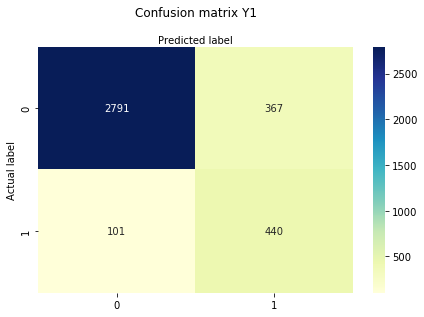

In [82]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Y1', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3158
           1       0.55      0.81      0.65       541

    accuracy                           0.87      3699
   macro avg       0.76      0.85      0.79      3699
weighted avg       0.90      0.87      0.88      3699



    g. Reviewing Correlations to Identify Highly Related/Correlated Features to Avoid in Analysis:


In [84]:
#define new dataframe, df_Prepped, which contains all the features, as adjusted per the Data Preparation above, along with the two target variables from the initial dataframe

df_Prepped = pd.concat([X,y],axis=1)

#check new dataframe, df_Prepped                
df_Prepped.head()





,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TotalDuration_per_PageValues_skew,Admin_per_PageValues_skew,AdminDuration_per_PageValues_skew,ProductRelated_per_PageValues_skew,Product_Duration_per_PageValues_skew,Holiday_Bin_skew,Browser_Bin_skew,Bounce_per_Exit_Rate_skew,Product_Duration_percent_TotalDuration_skew,Revenue
0,1,1.0,1,1.0,2,1.000000,1.20,1.20,1.0,0.0,...,0.032533,0.395896,0.280781,0.136637,0.031031,1.573276,0.000000,0.950450,0.000000,0
1,1,1.0,1,1.0,3,65.000000,1.00,1.10,1.0,0.0,...,0.214515,0.395896,0.280781,0.201201,0.233788,1.573276,0.522523,0.000000,0.566567,0
2,1,1.0,1,1.0,2,1.000000,1.20,1.20,1.0,0.0,...,0.032533,0.395896,0.280781,0.136637,0.031031,1.573276,0.000000,0.950450,0.000000,0
3,1,1.0,1,1.0,3,3.666667,1.05,1.14,1.0,0.0,...,0.068145,0.395896,0.280781,0.201201,0.067639,1.573276,0.522523,0.000000,0.145823,0
4,1,1.0,1,1.0,11,628.500000,1.02,1.05,1.0,0.0,...,0.633014,0.395896,0.280781,0.489489,0.663115,1.573276,0.892893,0.214897,0.863386,0


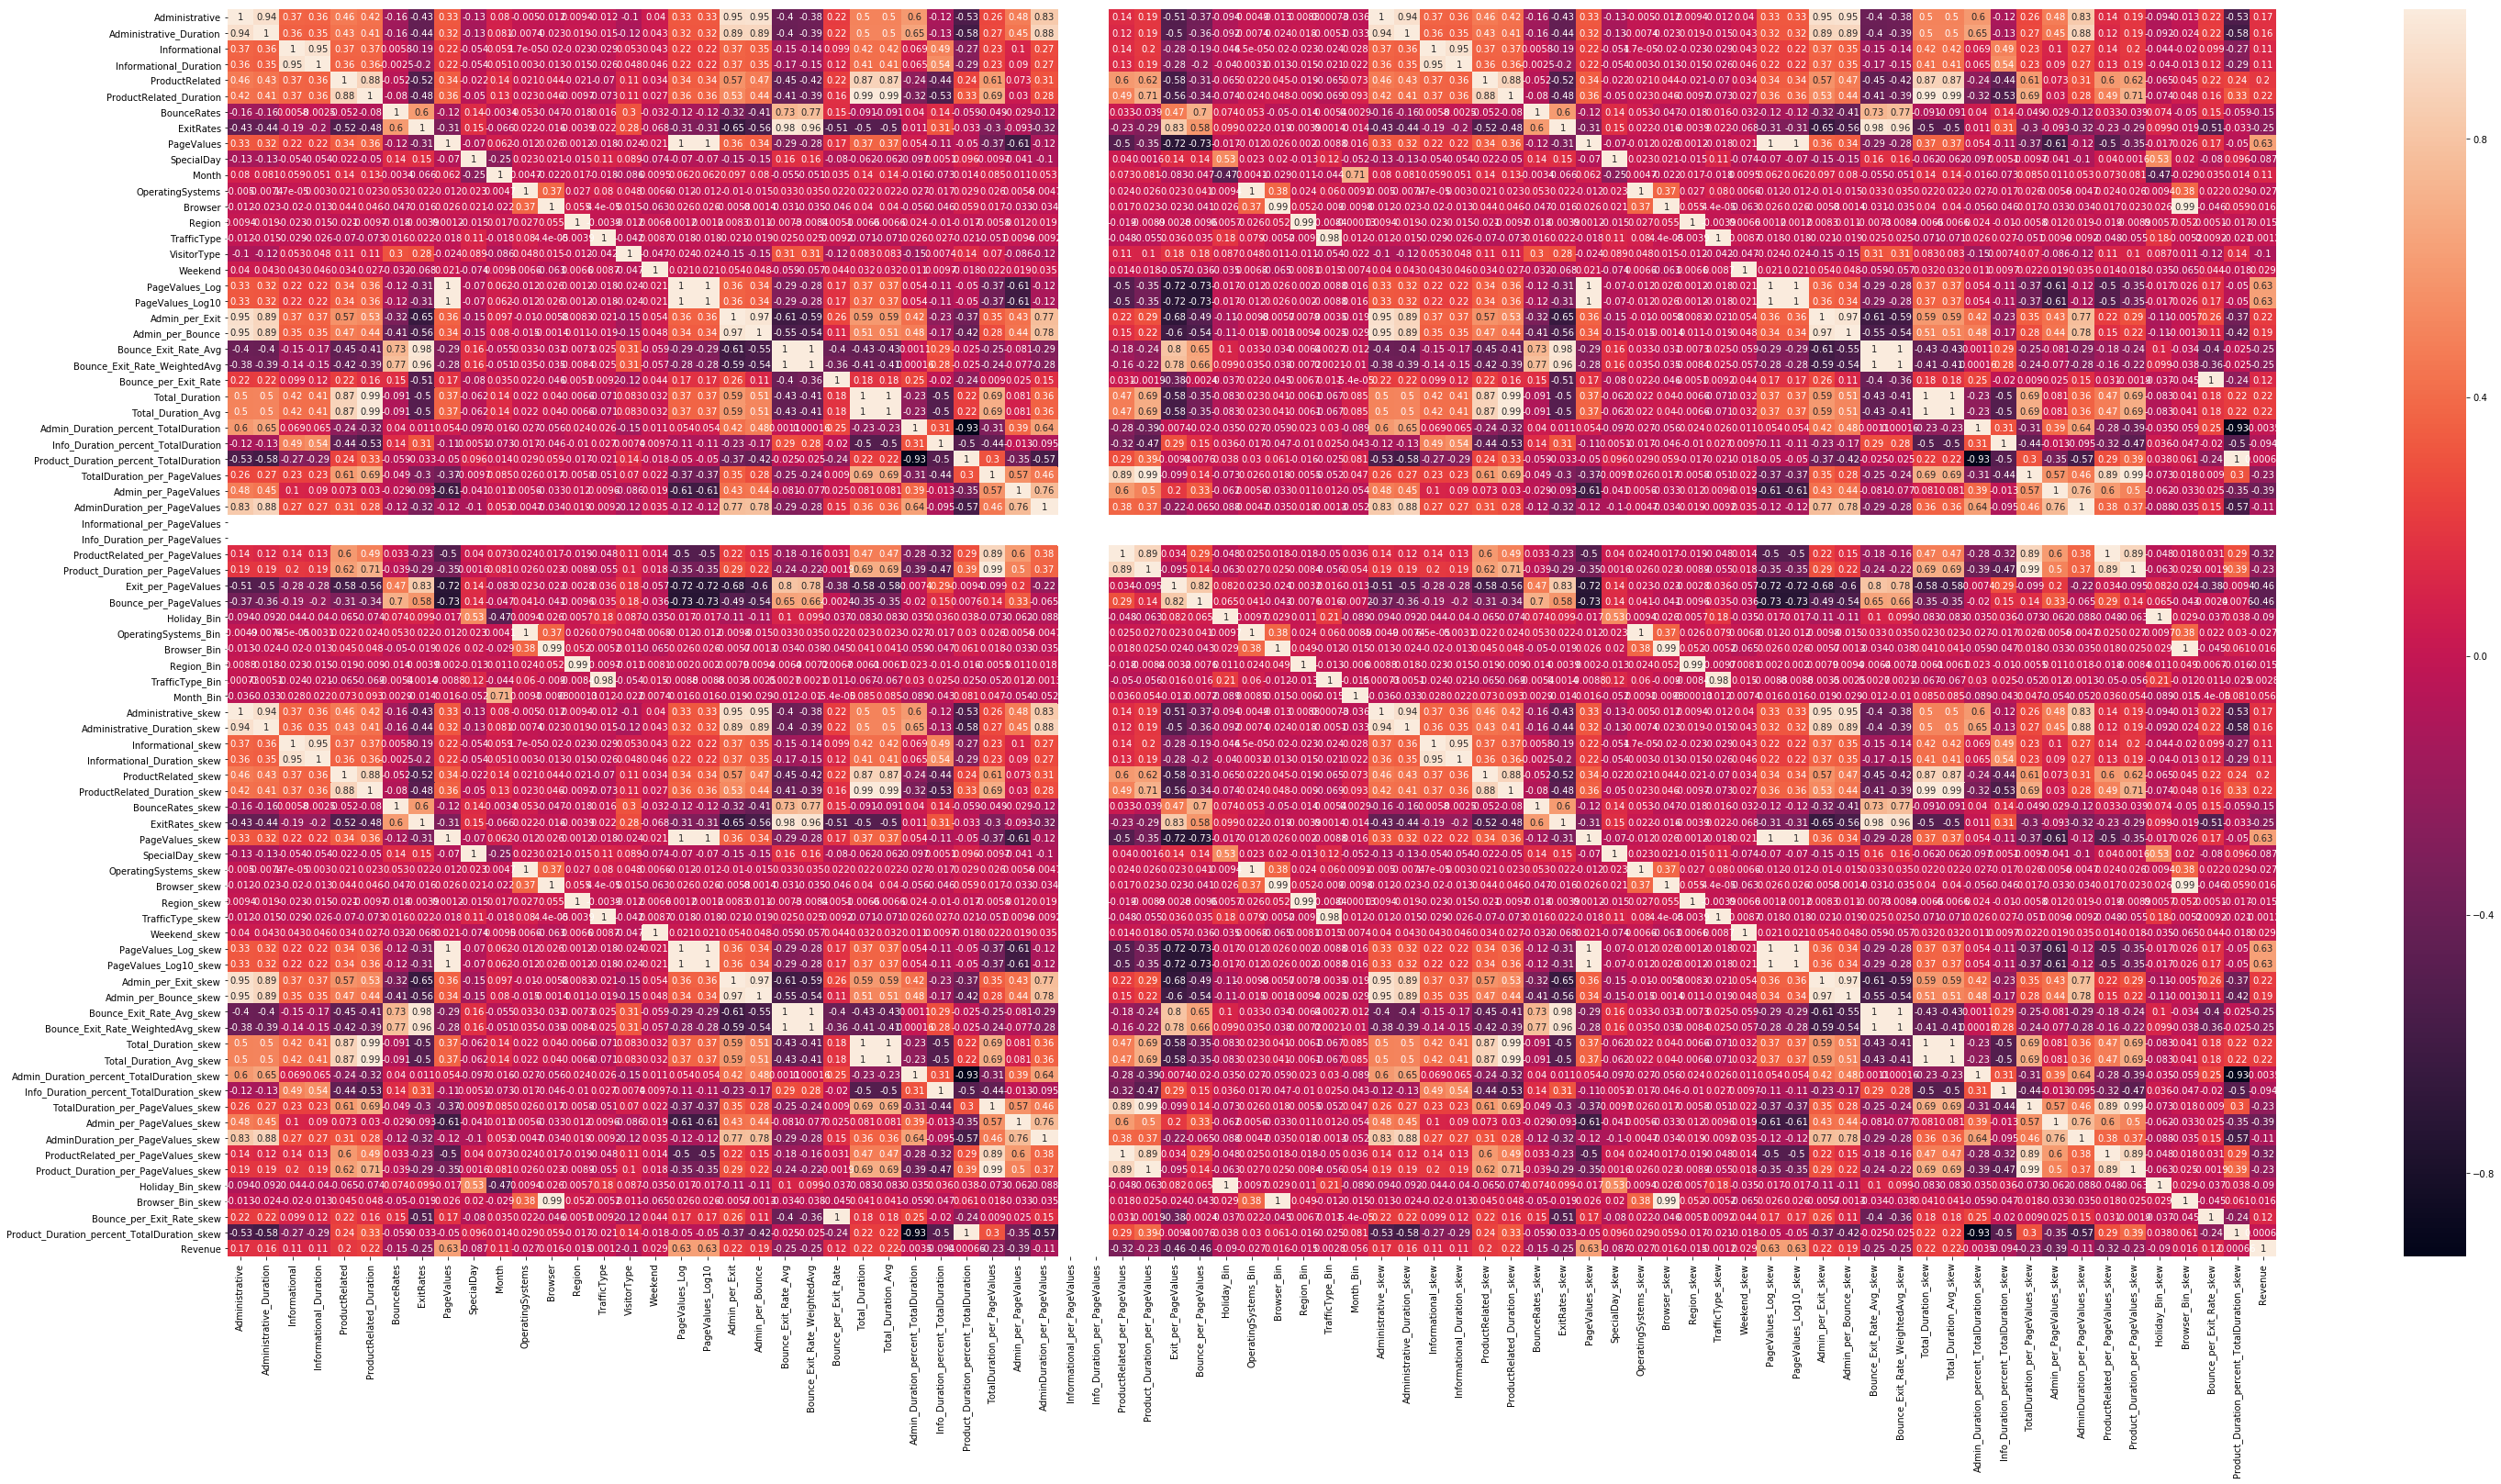

In [85]:
#Correlation Heatmap for the dataframe
spearman =df_Prepped.corr(method ='spearman')
plt.figure(figsize=(50,25))
sns.heatmap(spearman, annot=True)

In [86]:
corr_df = pd.DataFrame(X.corrwith(df_Prepped['Revenue']))

#filter skew attributes by absolute values of 0.5
corr_over = corr_df[(corr_df > 0.09).any(axis=1)]
corr_under = corr_df[(corr_df < -0.09).any(axis=1)]
display(corr_over.index)
display(corr_under.index)

corr_with_df = pd.concat([corr_over, corr_under])

model_cols = corr_with_df.index.tolist()
model_cols

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'ProductRelated', 'ProductRelated_Duration', 'PageValues', 'Month',
       'PageValues_Log', 'PageValues_Log10', 'Admin_per_Exit',
       'Admin_per_Bounce', 'Bounce_per_Exit_Rate', 'Total_Duration',
       'Total_Duration_Avg', 'Administrative_skew',
       'Administrative_Duration_skew', 'Informational_skew',
       'Informational_Duration_skew', 'ProductRelated_skew',
       'ProductRelated_Duration_skew', 'PageValues_skew',
       'PageValues_Log_skew', 'PageValues_Log10_skew', 'Admin_per_Exit_skew',
       'Admin_per_Bounce_skew', 'Total_Duration_skew',
       'Total_Duration_Avg_skew', 'Bounce_per_Exit_Rate_skew'],
      dtype='object')

Index(['BounceRates', 'ExitRates', 'VisitorType', 'Bounce_Exit_Rate_Avg',
       'Bounce_Exit_Rate_WeightedAvg', 'TotalDuration_per_PageValues',
       'Admin_per_PageValues', 'AdminDuration_per_PageValues',
       'ProductRelated_per_PageValues', 'Product_Duration_per_PageValues',
       'Exit_per_PageValues', 'Bounce_per_PageValues', 'BounceRates_skew',
       'ExitRates_skew', 'Bounce_Exit_Rate_Avg_skew',
       'Bounce_Exit_Rate_WeightedAvg_skew',
       'Info_Duration_percent_TotalDuration_skew',
       'TotalDuration_per_PageValues_skew', 'Admin_per_PageValues_skew',
       'AdminDuration_per_PageValues_skew',
       'ProductRelated_per_PageValues_skew',
       'Product_Duration_per_PageValues_skew'],
      dtype='object')

['Administrative',
 'Administrative_Duration',
 'Informational',
 'ProductRelated',
 'ProductRelated_Duration',
 'PageValues',
 'Month',
 'PageValues_Log',
 'PageValues_Log10',
 'Admin_per_Exit',
 'Admin_per_Bounce',
 'Bounce_per_Exit_Rate',
 'Total_Duration',
 'Total_Duration_Avg',
 'Administrative_skew',
 'Administrative_Duration_skew',
 'Informational_skew',
 'Informational_Duration_skew',
 'ProductRelated_skew',
 'ProductRelated_Duration_skew',
 'PageValues_skew',
 'PageValues_Log_skew',
 'PageValues_Log10_skew',
 'Admin_per_Exit_skew',
 'Admin_per_Bounce_skew',
 'Total_Duration_skew',
 'Total_Duration_Avg_skew',
 'Bounce_per_Exit_Rate_skew',
 'BounceRates',
 'ExitRates',
 'VisitorType',
 'Bounce_Exit_Rate_Avg',
 'Bounce_Exit_Rate_WeightedAvg',
 'TotalDuration_per_PageValues',
 'Admin_per_PageValues',
 'AdminDuration_per_PageValues',
 'ProductRelated_per_PageValues',
 'Product_Duration_per_PageValues',
 'Exit_per_PageValues',
 'Bounce_per_PageValues',
 'BounceRates_skew',
 'ExitRat

In [87]:
# Based on the above:
# - Need to choose only one of the variables for which there is a corresponding duration variable - namely:
#    ~Administrative_skew or Administrative_Duration_skew (correlation 0.94)
#    ~Informational_skew or Informational_Duration_skew (correlation 0.95)
#    ~ProductRelated_skew or Product_RelatedDuration_skew (correlation 0.88)
#    **Initial decision: utilize Administrative_skew and ProductRelated_Duration_skew as they are more highly correlated with Y1 and Y2;
#      utilize Informational_skew because it is distinct from Informational_Duration_skew and duration is incorporated into the Total_Duration variables (discussed below)

# - Need to choose only one of the variables from the binary variable pairs - namely:
#    ~Returning_Visitor or New_Visitor (correlation 1.00)
#    ~Not_Weekend or Is_Weekend (correlation 1.00)
#    **Initial decision: utilize Returning_Visitor and Is_Weekend variables as they are both positively corelated with the target variable, Sale.

# - Need to choose only one of the variables from pairs that capture related information - namely:
#    ~BounceRates_skew or ExitRates_skew (correlation 0.60)
#    ~Bounce_Exit_Rate_Avg_skew or Bounce_per_Exit_Rate_skew (correlation 0.62)
#    ~Total_Duration_skew or Total_Duration_Avg_Skew (correlation 1.00)
#    **Initial decision: For the first two, utilize the ones more strongly correlated with the corresponding Y values - namely: ExitRates_skew & Bounce_Exit_Rate_Avg_skew;
#      In the case of the third variable pair, we opt to use the value for Total_Duration_skew (rather than the averaged value)



In [88]:
#In light of the above, define new dataframe, df_Models, which contains all the features and target variables for use in our Data Modeling:

df_Models = df_Prepped[model_cols]

# df_Models = df_Prepped[['Administrative_skew','Informational_skew','ProductRelated_Duration_skew',\
#                         'ExitRates_skew', 'PageValues_skew', 'SpecialDay_skew','OperatingSystems_Bin', 'Browser_Bin', 'Region_Bin', 'TrafficType_Bin',\
#                         'Admin_per_Exit_skew', 'Bounce_Exit_Rate_Avg_skew','Total_Duration_skew',\
#                         'Month_May', 'Month_Nov', 'Month_Mar', 'Month_Dec', 'Month_Other','Returning_Visitor', 'Is_Weekend', 'No_Sale', 'Sale']]

#check new dataframe, df_Models                
df_Models.head()

,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,PageValues,Month,PageValues_Log,PageValues_Log10,Admin_per_Exit,...,BounceRates_skew,ExitRates_skew,Bounce_Exit_Rate_Avg_skew,Bounce_Exit_Rate_WeightedAvg_skew,Info_Duration_percent_TotalDuration_skew,TotalDuration_per_PageValues_skew,Admin_per_PageValues_skew,AdminDuration_per_PageValues_skew,ProductRelated_per_PageValues_skew,Product_Duration_per_PageValues_skew
0,1,1.0,1,2,1.000000,1.0,2,0.0,0.0,0.833333,...,1.000000,1.000000,1.000000,1.000000,0.884885,0.032533,0.395896,0.280781,0.136637,0.031031
1,1,1.0,1,3,65.000000,1.0,2,0.0,0.0,0.909091,...,0.000000,0.895896,0.847848,0.824324,0.732733,0.214515,0.395896,0.280781,0.201201,0.233788
2,1,1.0,1,2,1.000000,1.0,2,0.0,0.0,0.833333,...,1.000000,1.000000,1.000000,1.000000,0.884885,0.032533,0.395896,0.280781,0.136637,0.031031
3,1,1.0,1,3,3.666667,1.0,2,0.0,0.0,0.877193,...,0.888889,0.929799,1.000000,1.000000,0.884885,0.068145,0.395896,0.280781,0.201201,0.067639
4,1,1.0,1,11,628.500000,1.0,2,0.0,0.0,0.952381,...,0.777778,0.758258,0.779780,0.778278,0.357756,0.633014,0.395896,0.280781,0.489489,0.663115


    d. One Hot Encoding & Label Encoding

In [89]:
# # Pipeline - Encoding:
# oh_enc = OneHotEncoder(sparse=False) # initializing One-Hot Encoder Function

# ## One-Hot for VisitorType to create new columns for 'Returning_Visitor' and 'New_Visitor'
# encoder_visitortype = X[['VisitorType']].values
# visitortype_encoded = encoder_visitortype.reshape(len(encoder_visitortype), 1)
# visitortype_onehot_encoded = oh_enc.fit_transform(visitortype_encoded)
# visitortype_onehot_df = pd.DataFrame(visitortype_onehot_encoded, columns = ["Returning_Visitor", "New_Visitor"])
# visitortype_onehot_df.head()

# ## Creating list for newly-created columns for VisitorType
# visitor_list = visitortype_onehot_df.columns


# ## One-Hot for Weekend to create new columns for 'Is_Weekend' and 'Not_Weekend'
# encoder_weekend = df[['Weekend']].values
# weekend_encoded = encoder_weekend.reshape(len(encoder_weekend), 1)
# weekend_onehot_encoded = oh_enc.fit_transform(weekend_encoded)
# weekend_onehot_df = pd.DataFrame(weekend_onehot_encoded, columns = ["Not_Weekend", "Is_Weekend"])
# weekend_onehot_df.head()

# ## Creating list for newly-created columns for Weekend
# weekend_list = weekend_onehot_df.columns


# ## Combine Holiday Seasons Months
# ## One-Hot for Month to create new columns for "Month_May", "Month_Nov","Month_Mar", "Month_Dec", "Month_Other"
# encoder_month = df[['Month_Bin']].values
# month_onehot_encoded = oh_enc.fit_transform(encoder_month)
# month_onehot_df = pd.DataFrame(month_onehot_encoded,  columns = ["Month_May", "Month_Nov","Month_Mar", "Month_Dec", "Month_Other"])
# month_onehot_df.head()

# ## Creating list for newly-created columns for Month
# month_list = month_onehot_df.columns
# df [month_list] = month_onehot_df.loc[:,month_list]
# df['VisitorType'] = df['VisitorType'].replace('Other','Returning_Visitor')

# # ## We can delete the revenue encoding:
# # ## One-Hot Encoding for Y to separate into two new columns for 'Sale' and 'No_Sale'
# # encoder_revenue = df[['Revenue']].values
# # revenue_encoded = encoder_revenue.reshape(len(encoder_revenue), 1)
# # revenue_onehot_encoded = oh_enc.fit_transform(revenue_encoded)
# # revenue_onehot_df = pd.DataFrame(revenue_onehot_encoded, columns = ["No_Sale", "Sale"])
# # revenue_onehot_df.head(30)

# # ## Creating list for newly-created columns for Y
# # rev_list = revenue_onehot_df.columns

# ## Code to add newly created columns to the df
# X[month_list] = month_onehot_df.loc[:,month_list]
# X[visitor_list] = visitortype_onehot_df.loc[:,visitor_list]
# X[weekend_list] = weekend_onehot_df.loc[:,weekend_list]


    h. Reshape the training dataset

In [90]:
# Split the df_Models dataset
X_Models,y_Models = df_Models.iloc[:,:],df_Prepped.iloc[:,-1]

# Set the training at 30% (as above for baseline) given the modest size of the dataset (~12,000 observations)
X_Models_train, X_Models_test, y_Models_train, y_Models_test = train_test_split(X_Models, y_Models, test_size=0.3,random_state=500) 

#print out the first five rows of the training data
display(X_Models_train.head(),y_Models_train.head())

,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,PageValues,Month,PageValues_Log,PageValues_Log10,Admin_per_Exit,...,BounceRates_skew,ExitRates_skew,Bounce_Exit_Rate_Avg_skew,Bounce_Exit_Rate_WeightedAvg_skew,Info_Duration_percent_TotalDuration_skew,TotalDuration_per_PageValues_skew,Admin_per_PageValues_skew,AdminDuration_per_PageValues_skew,ProductRelated_per_PageValues_skew,Product_Duration_per_PageValues_skew
11982,4,57.0,1,20,2118.654762,7.708901,12,2.042376,0.886992,3.943045,...,0.000000,0.259716,0.223223,0.213592,0.090273,0.447128,0.150261,0.583263,0.174092,0.476489
8832,3,24.0,1,40,1829.966667,21.592471,11,3.072345,1.334302,2.940930,...,0.552052,0.393273,0.418012,0.423423,0.117396,0.246483,0.082099,0.501578,0.107546,0.270686
3459,1,1.0,1,7,57.000000,1.000000,5,0.000000,0.000000,0.925926,...,0.868368,0.863363,0.879379,0.878378,0.746709,0.199031,0.395896,0.280781,0.368869,0.217106
2030,2,186.0,7,7,134.333333,1.000000,3,0.000000,0.000000,1.962264,...,0.000000,0.368055,0.310030,0.294299,0.884885,0.613614,0.669670,1.000000,0.368869,0.337919
11120,6,146.0,3,34,2162.133333,17.581652,11,2.866856,1.245060,5.742801,...,0.699700,0.724815,0.720894,0.713155,0.884885,0.326159,0.130288,0.591632,0.109755,0.324294


11982    1
8832     1
3459     0
2030     0
11120    1
Name: Revenue, dtype: int64

In [95]:
# Code to re-shape the data for Modeling

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
# X, y = make_classification(n_classes=2, class_sep=2,
#     weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
#     n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=2019)
print('Original dataset shape %s' % Counter(y_Models))
#Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE(random_state=42)
resampled_X_Models_train, resampled_y_Models_train = sm.fit_resample(X_Models_train, y_Models_train) #DWM Note: Are we SURE on "Models" in last X_train, y2_train - per SMOTE doc from Tao
print('Resampled dataset shape %s' % Counter(resampled_y_Models_train))
#Resampled dataset shape Counter({0: 900, 1: 900})


Original dataset shape Counter({0: 10422, 1: 1908})
Resampled dataset shape Counter({1: 7264, 0: 7264})


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [96]:
#Print first 5 rows
display(resampled_X_Models_train.sample(5))

AttributeError: 'numpy.ndarray' object has no attribute 'sample'

# Part IV: Data Analysis/Modeling <a name="part4"></a>

##### add resampled data into models **
##### can also delete all of the y2 models

## A. Naive Bayes Model (NB)
>   <b> Assumption: </b> Model features all are independent; we have included all features we believe independent per the immediately preceding correlation analysis
<br><b> Calculate Accuracy: </b> How many times are you right?
<br><b> Answer: </b> 
* <b> Y1 </b>: 81.21% accuracy (AUC = 0.8741)

###0. Step 0: Import Needed Packages

In [97]:
# import the metrics class
from sklearn import metrics

# import other required modules for confusion matrices
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

###1. Step 1: Specify the Model

In [98]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

###2. Steps 2-4: Generate Test Data, Build the Models & Assess the Models for y2

y Accuracy: 0.8718572587185726

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3158
           1       0.54      0.82      0.65       541

    accuracy                           0.87      3699
   macro avg       0.75      0.85      0.79      3699
weighted avg       0.90      0.87      0.88      3699



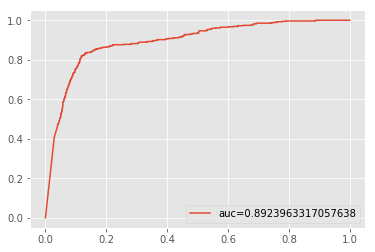

Text(0.5,257.44,'Predicted label')

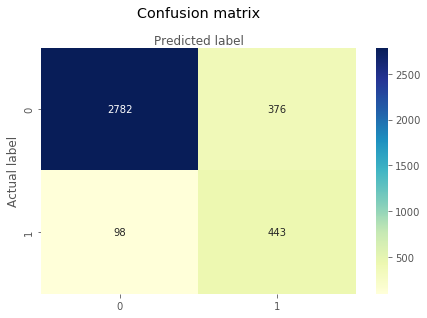

In [99]:
#Train the model using the training sets - for y2 (Sale)
gnb.fit(X_Models_train, y_Models_train)

#Predict the response for test dataset for y2
y_NB_pred = gnb.predict(X_Models_test)

# Model Accuracy, how often is the classifier correct?
# Accuracy for y2
print("y Accuracy:",metrics.accuracy_score(y_Models_test, y_NB_pred))
print("")

#Can use classification report to assess model adequacy, too
print(metrics.classification_report(y_Models_test, y_NB_pred, labels=class_names))

#AUC for y2
y_NB_pred_proba = gnb.predict_proba(X_Models_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_Models_test,  y_NB_pred_proba)
auc = metrics.roc_auc_score(y_Models_test, y_NB_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_Models_test, y_NB_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [100]:
#Conclusion - With accuracy of 81% for each y1 and y2, the Naive Bayes model is superior to the base model which had an accuracy of 71% for each target.
#However, there is still room for improvement.

In [101]:
# MD's Modeling Work

## B. Decision Tree Model (DT)
>   <b> Assumption: </b> All features are usefull for Y1 & Y2!
<br><b> Calculate: </b> How many times are you right?
<br><b> Reason: </b> This can be set as the baseline for our accuracy of Y1 and Y2 - the computer model should at least beat this in order for it to be better than guessing.
<br><b> Answer: </b> 
* <b> Y1 </b>: 85.56% accuracy
* <b> Y2: </b> 85.45% accuracy

#### Specify the Model

In [102]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [103]:
# Just to take look at the models df to see if everything is correct
df_Models.head()

,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,PageValues,Month,PageValues_Log,PageValues_Log10,Admin_per_Exit,...,BounceRates_skew,ExitRates_skew,Bounce_Exit_Rate_Avg_skew,Bounce_Exit_Rate_WeightedAvg_skew,Info_Duration_percent_TotalDuration_skew,TotalDuration_per_PageValues_skew,Admin_per_PageValues_skew,AdminDuration_per_PageValues_skew,ProductRelated_per_PageValues_skew,Product_Duration_per_PageValues_skew
0,1,1.0,1,2,1.000000,1.0,2,0.0,0.0,0.833333,...,1.000000,1.000000,1.000000,1.000000,0.884885,0.032533,0.395896,0.280781,0.136637,0.031031
1,1,1.0,1,3,65.000000,1.0,2,0.0,0.0,0.909091,...,0.000000,0.895896,0.847848,0.824324,0.732733,0.214515,0.395896,0.280781,0.201201,0.233788
2,1,1.0,1,2,1.000000,1.0,2,0.0,0.0,0.833333,...,1.000000,1.000000,1.000000,1.000000,0.884885,0.032533,0.395896,0.280781,0.136637,0.031031
3,1,1.0,1,3,3.666667,1.0,2,0.0,0.0,0.877193,...,0.888889,0.929799,1.000000,1.000000,0.884885,0.068145,0.395896,0.280781,0.201201,0.067639
4,1,1.0,1,11,628.500000,1.0,2,0.0,0.0,0.952381,...,0.777778,0.758258,0.779780,0.778278,0.357756,0.633014,0.395896,0.280781,0.489489,0.663115


#### Build the Model (For y2 - Sale)

In [109]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_Models_train,y_Models_train)

#Predict the response for test dataset
y_DT_pred = clf.predict(X_Models_test)

In [110]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_Models_test, y_DT_pred))

Accuracy: 0.8569883752365505


#### Assess the Model

In [111]:
# Evaluating the Classification Report
print(metrics.classification_report(y_Models_test, y_DT_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3158
           1       0.51      0.56      0.53       541

    accuracy                           0.86      3699
   macro avg       0.72      0.73      0.72      3699
weighted avg       0.86      0.86      0.86      3699



In [112]:
# Evaluating the Confusion Matrix
print(metrics.confusion_matrix(y_Models_test, y_DT_pred))

[[2869  289]
 [ 240  301]]


85.45% is much better than the baseline model of 70%

#### *** Attempted Model Optimization - Not 100% if I optimized these correctly

##### y2 (Sale)

In [119]:
# Trying to optimize Decision Tree Model by adding in the parameters "entropy" (information gain selection measure) and "max depth=3"
# # Did this in order to reduce to complexity of the Decision Tree, in hopes that it will yield better results
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = "entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_Models_train,y_Models_train)

#Predict the response for test dataset
y_DT_pred = clf.predict(X_Models_test)

In [120]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_Models_test, y_DT_pred))

Accuracy: 0.8980805623141389


In [121]:
# Evaluating the Classification Report
print(metrics.classification_report(y_Models_test, y_DT_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3158
           1       0.68      0.57      0.62       541

    accuracy                           0.90      3699
   macro avg       0.81      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699



In [122]:
# Evaluating the Confusion Matrix
print(metrics.confusion_matrix(y_Models_test, y_DT_pred))

[[3015  143]
 [ 234  307]]


##### Not sure if the optimized model is overfitting, but 89.53% accuracy is better than the base Decision Tree Models

## C. Random Forest Model (RF)
>   <b> Assumption: </b> All features are usefull for Y1 & Y2!
<br><b> Calculate: </b> How many times are you right?
<br><b> Reason: </b> This can be set as the baseline for our accuracy of Y1 and Y2 - the computer model should at least beat this in order for it to be better than guessing.
<br><b> Answer: </b> 
* <b> Y1 </b>: 90% accuracy
* <b> Y2: </b> 90% accuracy (not sure if Y2 result should be the same as Y1 but could make sense)

#### Specify the Model

In [123]:
# Building a Classifier
#Import scikit-learn dataset library
from sklearn import datasets

#### Build Model for y2 (Sale)

In [127]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_Models_test)
clf.fit(X_Models_train,y_Models_train)

y_RF_pred = clf.predict(X_Models_test)

In [128]:
# Evaluation of the Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_Models_test, y_RF_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3158
           1       0.69      0.58      0.63       541

    accuracy                           0.90      3699
   macro avg       0.81      0.77      0.78      3699
weighted avg       0.89      0.90      0.90      3699



In [129]:
# Evaluation of the Confusion Matrix
print(confusion_matrix(y_Models_test, y_RF_pred))

[[3016  142]
 [ 229  312]]


##### 90% accuracy for both Random Forest Models, so far better than the Decision Tree Models

#### More to do... Can do Feature Importance using scikit_learn - have the code for it but couldn't get it to run ***

In [117]:
# # Attempt on the feature selection using scikit-learn
# # import the package
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_Models_train,y_Models_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
# import pandas as pd
# feature_imp = pd.Series(clf.feature_importances_,index=y_Models_test).sort_values(ascending=False)
# feature_imp

## D. Support Vector Machines (SVM) Classification Model (SVC)
>   <b> Assumption: </b> All features are usefull for Y1 & Y2!
<br><b> Calculate: </b> How many times are you right?
<br><b> Reason: </b> This can be set as the baseline for our accuracy of Y1 and Y2 - the computer model should at least beat this in order for it to be better than guessing.
<br><b> Answer: </b> 
* <b> Y1 </b>: 70.78% accuracy
* <b> Y2: </b> 70.78% accuracy (not sure if Y2 result should be the same as Y1 but could make sense)

In [459]:
###1. Step 1: Specify the Model
from sklearn import svm
svc = svm.SVC(kernel='linear',cache_size=7000,gamma= 0.001, C=100)

In [460]:
###2. Step 2: Generate Test Data
# X_train_svc, X_test_svc, y1_train_svc, y1_test_svc, y2_train_svc, y2_test_svc = train_test_split(X, y1,y2, test_size=0.3,random_state=1000) 
# X_Models_train, X_Models_test, y1_Models_train, y1_Models_test, y2_Models_train, y2_Models_test
#Standard Scale the data to allow for better SVC model performance
# scaler = StandardScaler().fit(X_Models_train) 
# standardized_X_svc = scaler.transform(X_Models_train) 
# standardized_X_test_svc = scaler.transform(X_Models_test)

In [ ]:
###3. Step 3: Build the Model
#Train the model using the training sets
svc.fit(X_Models_train, y_Models_train)

#Predict the response for test dataset
y_pred_svc = svc.predict(X_Models_test)

In [ ]:
###4. Step 4: Assess the Model
print("Accuracy_svc:",metrics.accuracy_score(y_Models_test, y_pred_svc))
cnf_matrix_svc = metrics.confusion_matrix(y_Models_test, y_pred_svc)

print(cnf_matrix_svc)

class_names_svc=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_svc = np.arange(len(class_names_svc))
plt.xticks(tick_marks_svc, class_names_svc)
plt.yticks(tick_marks_svc, class_names_svc)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix svc', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_Models_test, y_pred_svc))
print("Accuracy_svc:",metrics.accuracy_score(y_Models_test, y_pred_svc))

## E. XGBoost Model (XGB)
>   <b> Assumption: </b> XXXAll features are usefull for Y1 & Y2!XXX
<br><b> Calculate: </b> How many times are you right?
<br><b> Reason: </b> XXXThis can be set as the baseline for our accuracy of Y1 and Y2 - the computer model should at least beat this in order for it to be better than guessing.XXX
<br><b> Answer: </b> 
* <b> Y2 </b>: 90.19% accuracy
* <b> Y2: </b> XXX94.97 RMSEXXX - not sure this is right!!!

###0. Step 0: Import Needed Packages

In [130]:
#Import Needed Packages
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

#Do preliminary work


###1. Step 1: Specify the Model

In [133]:
#Instantiate an XGBoost Classifer Model - for y1 (No_Sale)
XGB_class = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)


###2. Steps 2-4: Generate Test Data, Build the Models & Assess the Models for y2 (Sale)

In [135]:
#Put Data into structure for XGBoost- for y2 (Sale) 
data_dmatrix = xgb.DMatrix(data=X_Models,label=y_Models)

#Train the model using the training sets for y1
XGB_class.fit(X_Models_train, y_Models_train)

#Predict the response for test dataset for y1
y_XGB_pred = XGB_class.predict(X_Models_test)

#Calculate RMSE for y2
rmse_XGB = np.sqrt(mean_squared_error(y_Models_test, y_XGB_pred))
print("XGBoost's RMSE for y2 is: %f" % (rmse_XGB))

#Create error ratio to evaluate results for y2
target_range_XGB = y_Models.max() - y_Models.min()
print("XGB target range is: %f" % (target_range_XGB))
error_ratio_XGB = rmse_XGB/target_range_XGB
print("XGBoost's Error Ratio for y2 is: %f" % (error_ratio_XGB))

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\xgboost\core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



XGBoost's RMSE for y2 is: 0.309793
XGB target range is: 1.000000
XGBoost's Error Ratio for y2 is: 0.309793


In [136]:
#ISSUE WITH THE ABOVE - HOW COME THE TARGET RANGE IS 1? DOES IT HAVE TO DO WITH 0/1 STATUS OF TARGET VARIABLE???

y Accuracy: 0.9040281157069479

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3158
           1       0.70      0.59      0.64       541

    accuracy                           0.90      3699
   macro avg       0.82      0.77      0.79      3699
weighted avg       0.90      0.90      0.90      3699



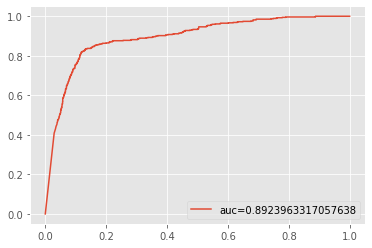

Text(0.5, 257.44, 'Predicted label')

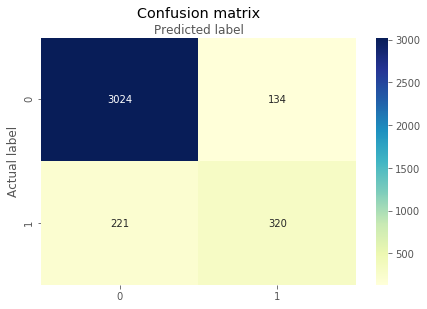

In [137]:
# Model Accuracy, how often is the classifier correct?
# Accuracy for y2
print("y Accuracy:",metrics.accuracy_score(y_Models_test, y_XGB_pred))
print("")


#Can use classification report to assess model adequacy, too
print(metrics.classification_report(y_Models_test, y_XGB_pred, labels=class_names))

#AUC for y1
y_XGB_pred_proba = gnb.predict_proba(X_Models_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_Models_test,  y_XGB_pred_proba)
auc = metrics.roc_auc_score(y_Models_test, y_XGB_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_Models_test, y_XGB_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# More to go...including: k-fold cross-validation, visualization for feature importance & hyper-parameter tuning to improve model

## F. Neural Network Model (NN)
>   <b> Assumption: </b> All features are usefull for Y1 & Y2!
<br><b> Calculate: </b> How many times are you right?
<br><b> Reason: </b> This can be set as the baseline for our accuracy of Y1 and Y2 - the computer model should at least beat this in order for it to be better than guessing.
<br><b> Answer: </b> 
* <b> Y1 </b>: 90.26% accuracy
* <b> Y2: </b> -% accuracy (not sure if Y2 result should be the same as Y1 but could make sense)

In [146]:
# X_Models_train, X_Models_test, y1_Models_train, y1_Models_test, y2_Models_train, y2_Models_test


###1. Step 1: Specify the Model
# Import the model
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
mlp = MLPClassifier(hidden_layer_sizes = (3),solver='sgd',learning_rate_init= 0.01, max_iter=50)

In [147]:
###2. Step 2: Generate Test Data
# Train the model
mlp.fit(X_Models_train, y_Models_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=3, learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=50, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [148]:
###3. Step 3: Build the Model
## Add in (5,5) -> hidden_layer_sizes

# Outputs:
MLPClassifier (activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9, 
beta_2=0.999, early_stopping=False, epsilon=1e-08,       
hidden_layer_sizes=(5), learning_rate='constant',      
learning_rate_init=0.01, max_iter=50, momentum=0.9,       
nesterovs_momentum=True, power_t=0.5, random_state=None,       
shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,       
verbose=False, warm_start=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=5, learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=50, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=True)

In [149]:
###4. Step 4: Assess the Model
# Score takes a feature matrix X_test and the expected target values y_test. 
# Predictions for X_test are compared with y_test
print(mlp.score(X_Models_test,y_Models_test))

0.8537442552041092


## Logistic Regression Model

>   <b> Assumption: </b> All features are usefull for Y
<br><b> Calculate: </b> How many times are you right?
<br><b> Reason: </b> This can be set as the baseline for our accuracy of Y - the computer model should at least beat this in order for it to be better than guessing.
<br><b> Answer: </b> 
* <b> Y </b>: 90.3% accuracy - about the same as our other best scores

In [127]:
#Build the model
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_Models_train,y_Models_train)

#
y_LR_pred=logreg.predict(X_Models_test)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [128]:
# import the metrics class for the Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_Models_test, y_LR_pred)
cnf_matrix

array([[3025,  133],
       [ 291,  250]])

Text(0.5,257.44,'Predicted label')

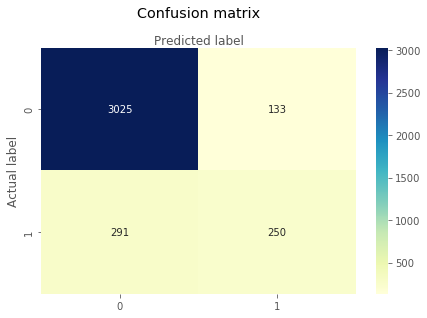

In [129]:
# Visualizing the Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

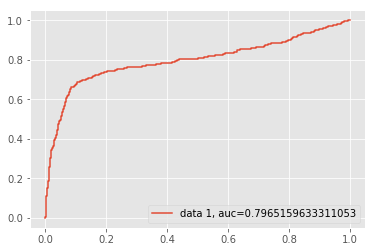

In [133]:
# ROC Curve
y_pred_proba = logreg.predict_proba(X_Models_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_Models_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_Models_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [130]:
print("Accuracy:",metrics.accuracy_score(y_Models_test, y_LR_pred))
print("Precision:",metrics.precision_score(y_Models_test, y_LR_pred))
print("Recall:",metrics.recall_score(y_Models_test, y_LR_pred))

Accuracy: 0.8853744255204109
Precision: 0.6527415143603134
Recall: 0.46210720887245843


In [131]:
#90.3% accuracy 

## K-Means Model

In [134]:
#important packages

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
%matplotlib inline

In [135]:
X_kmeans = np.array(X_Models_train)
y_kmeans = np.array(y_Models_train)

In [136]:
# Build the model

# load the model
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto') # 2 clusters, sale or no sale
kmeans.fit(X_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [137]:
# Predictions
correct = 0
for i in range(len(X_kmeans)):
    predict_me = np.array(X_kmeans[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y_kmeans[i]:
        correct += 1

print(correct/len(X_kmeans))

0.26068821689259647


# Part V: Validation  <a name="part5"></a>

# Part VI: Presentation/Visualization  <a name="part6"></a>

# Part VII: Sources  <a name="part7"></a>
1. https://i.ytimg.com/vi/CRKn-9gVNBw/maxresdefault.jpg
2. https://support.google.com/analytics

# ???-Part VIII: Next Steps (Discuss deployment??? Lessons learned??? Additional analyses had time permitted???)